# Bitte die doctstrings zu den Modulen erst lesen mit help() function.

## Siehe unten und spielen nach importieren.

# Importing Modules

In [ ]:
from pprint import pprint
import skansensor.skansensor as ss      ### Wenn das Notebook von dem Ordner wo den Ordner skansensor geöffnet wird
import skansensor.datacollector as dc   ##### Muss die Module so importiert werden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dc1 = dc.DataCollector()

In [ ]:
dirlist = dc1.get_files('./data') #'./data' ist nur den faden zum Datein Ordner

In [ ]:
datasets = dc1.collect(dirlist)

In [ ]:
pprint(datalist) # Nur die Dcitionaries zu schauen mit den gereinigten Datein und die Metadata

In [37]:
# Graphs zu zeichnen for alle Datein
for dataset in datasets:
    time = dataset['data']['time']
    if dataset['type'] == 'dropsense':
        datapoints = dataset['data']['data_mamp']
    elif dataset['type'] == 'picarro':
        datapoints = dataset['data']['H2O2']
    plt.plot(time, datapoints)
    plt.title(dataset['path'])
    plt.show()

NameError: name 'plt' is not defined

In [ ]:
help(ss)

In [1]:
help(dc)

NameError: name 'dc' is not defined

In [59]:
import os
from collections import namedtuple
from time import time
import skansensor.skansensor as ss

dir_list = []

def get_files(path = '.'):
        """
           Loops through a folder hierarchy from a given path.
           If no path is given, it searches through the current
           directory.
           The method returns a namedtuple of:
               path, kind of file/folder, and if a file, the extension
           
           Parameters:
           -------------
           path: path to the parent directory to loop through. 
                 Default is current directory
           
           returns:
           -------------
           dir_list: a list of all files or folders as a namedtuple.
                     Attributes of the namedtuple are:
                     path: path to file or folder
                     whatis: dir or data
                     whatext: what extension the data file has.
                              (only dropsense and picarro)
        """  
        # Opens an instance of a directory
        with os.scandir(path) as it:
        # loop through all items in a directory
            for entry in it:
                cat = namedtuple('cat', ['path', 'whatis', 'whatext'])

                if entry.is_dir():
                    get_files(entry.path)
                
                else:
                    filename, fileext = os.path.splitext(entry.path)
                    if fileext == '.mta':
                        cat.path = entry.path
                        cat.whatis = 'dropsense'
                        cat.whatext = fileext
                        dir_list.append(cat)
                        
                    elif fileext == '.dat':
                        cat.path = entry.path
                        cat.whatis = 'picarro'
                        cat.whatext = fileext
                        dir_list.append(cat)
                    else:
                        pass
                
        yield dir_list

def collect(dir_list):
        """
        Parameters:
        ------------
        dir_list: the list of files and folders.
                  Expected the result of the method get_files()

        returns:
        ------------
        data_list: a list of dictionaries that contain data read
                   from data files.
                   Refer to 'skansensor' module for the data structure.
        """
        datalist = []
        for a in dir_list:
            if a.whatis == 'dropsense':
                d = {
                    'path' : a.path,
                    'type' : 'dropsense',
                    'data' : ss.read_dropsense(a.path)
                    }
            elif a.whatis == 'picarro':
                d = {
                    'path' : a.path,
                    'type' : 'picarro',
                    'data' : ss.read_picarro(a.path)
                    }
            if d not in datalist:
                datalist.append(d)
        return datalist

In [60]:
t = time()
dirlist = get_files('./data')
time()-t

0.2954726219177246

In [62]:
t = time()
datasets = collect(dirlist)
time() - t

3.771977424621582

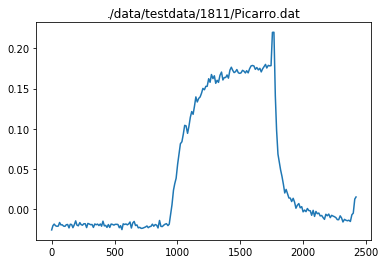

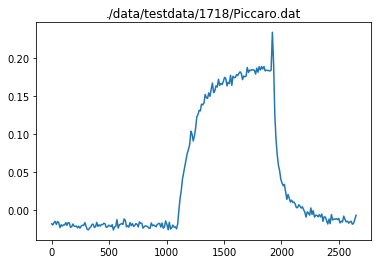

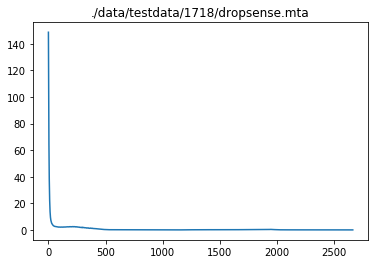

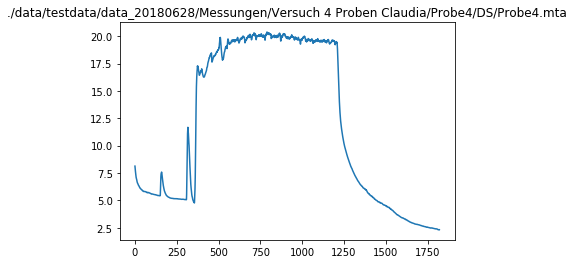

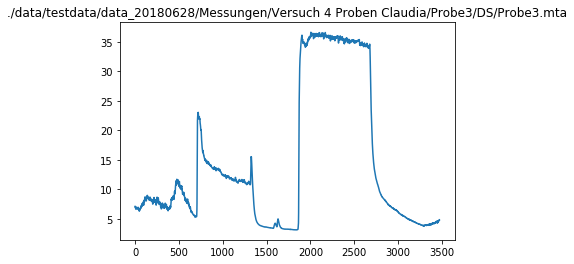

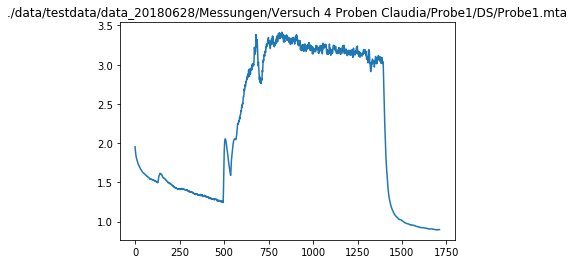

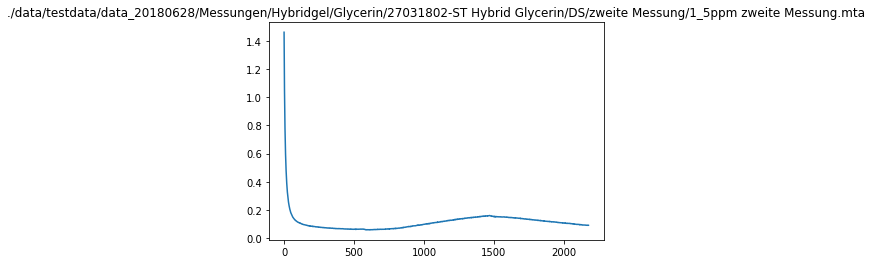

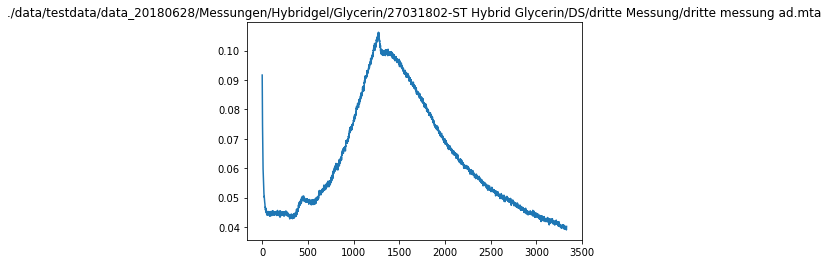

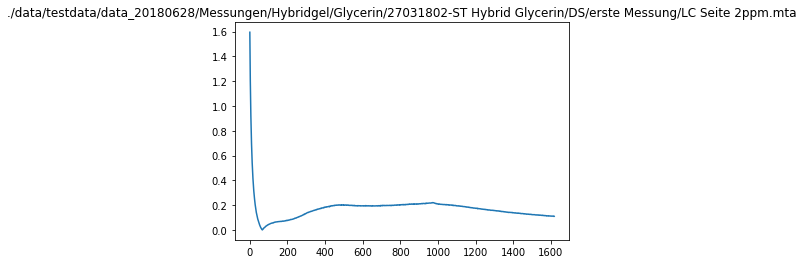

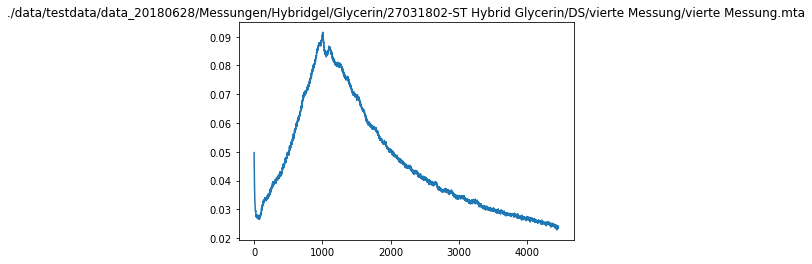

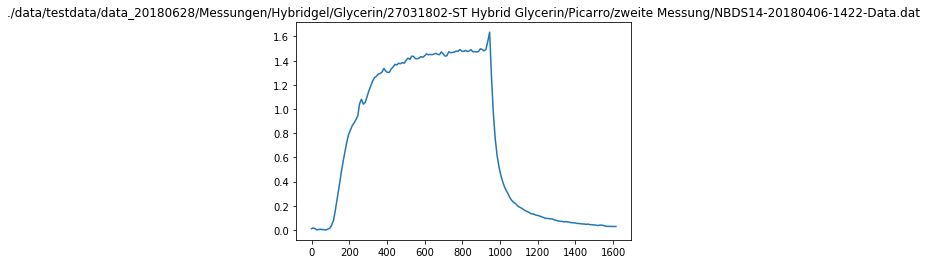

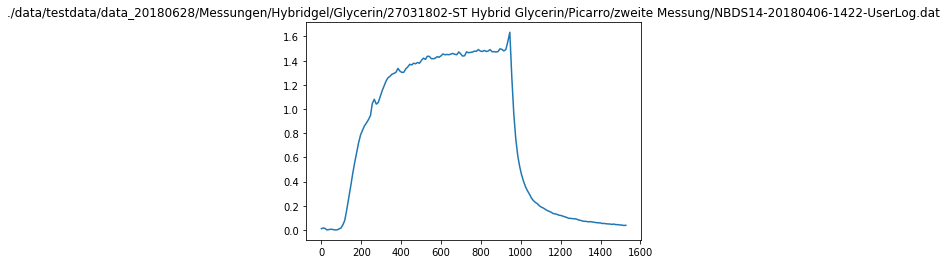

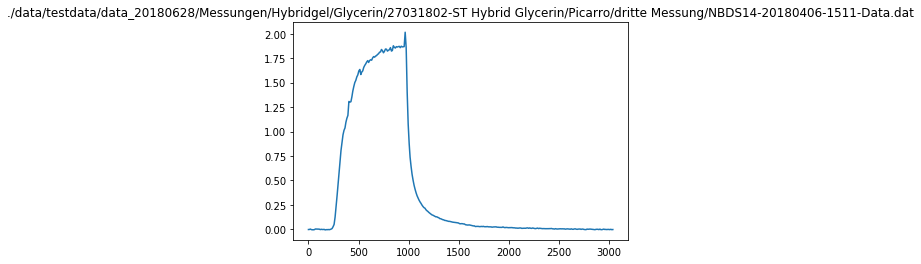

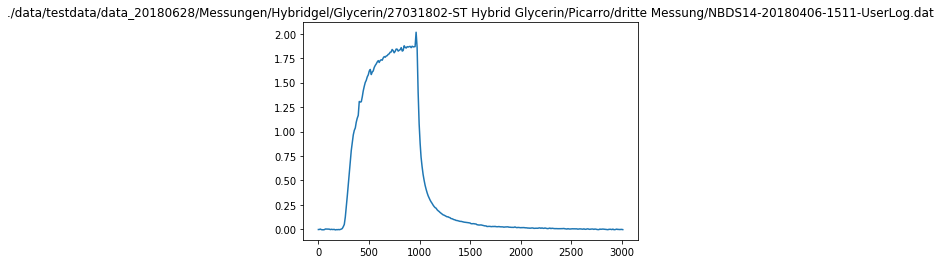

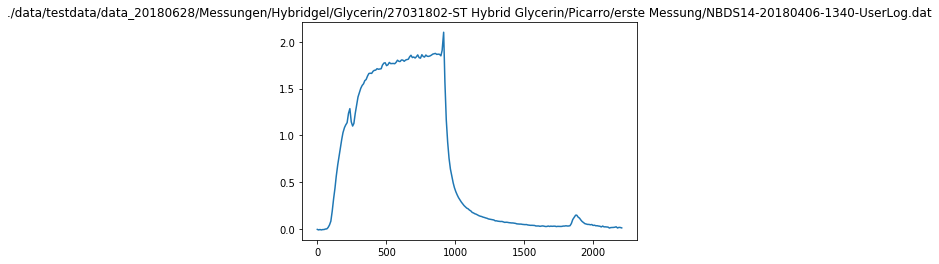

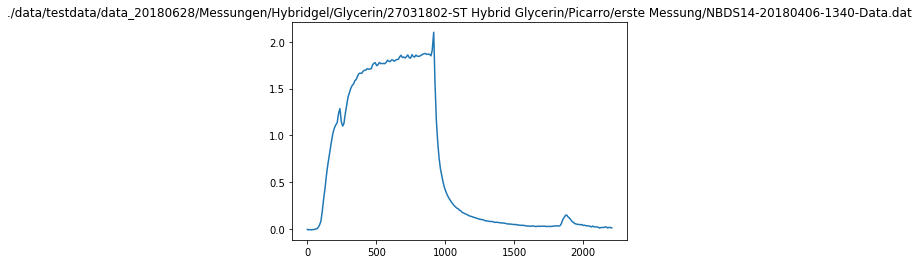

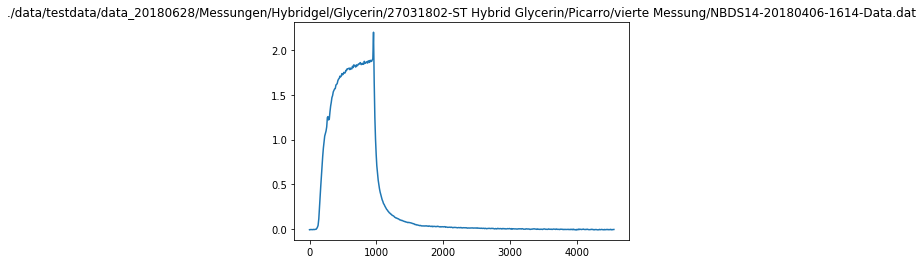

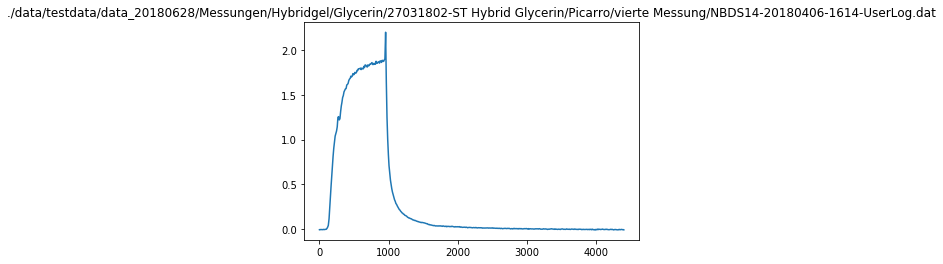

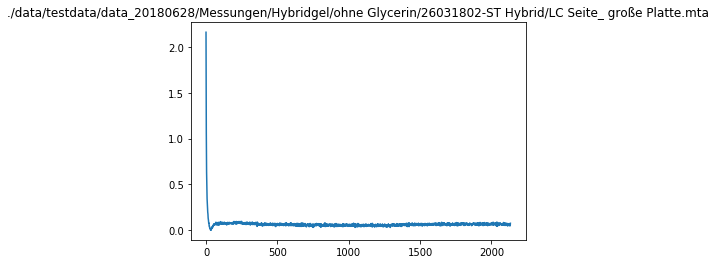

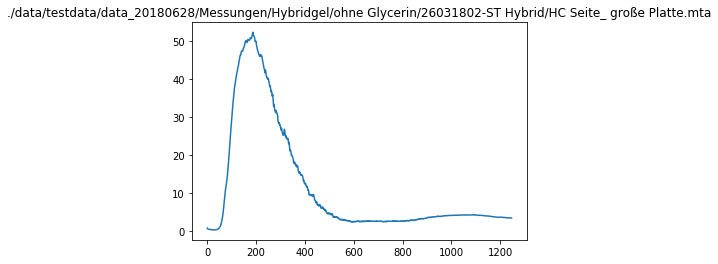

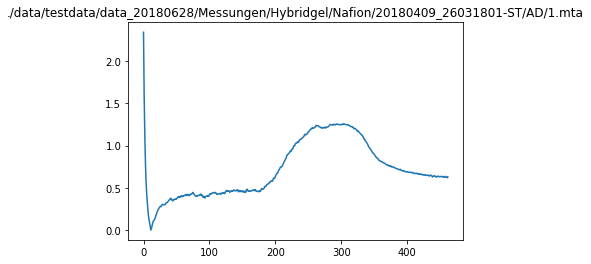

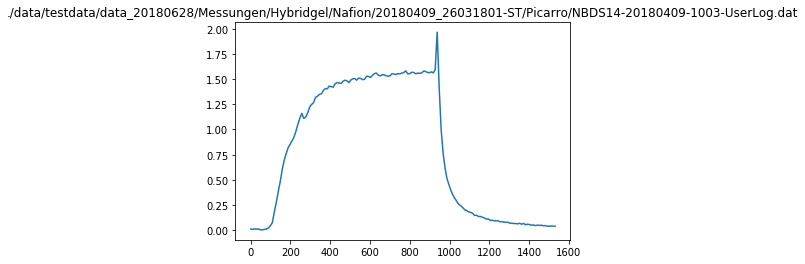

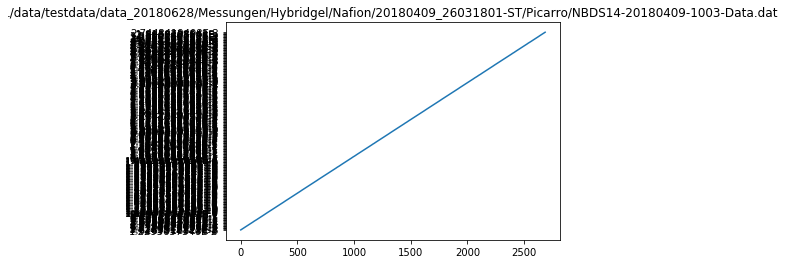

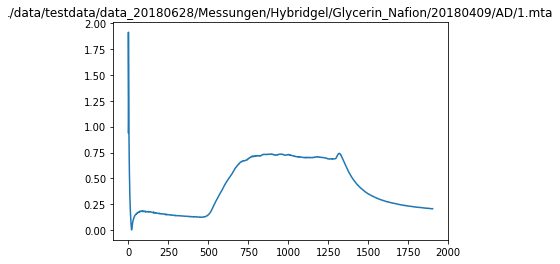

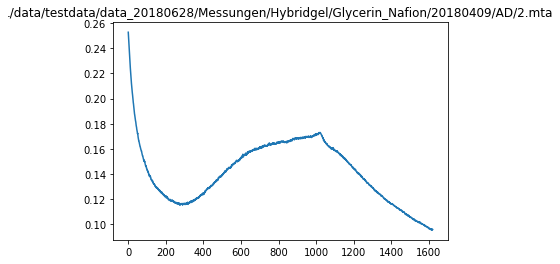

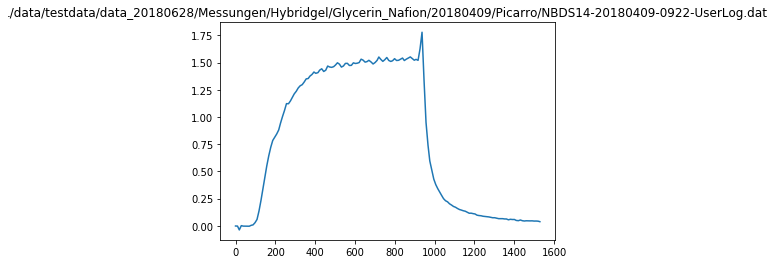

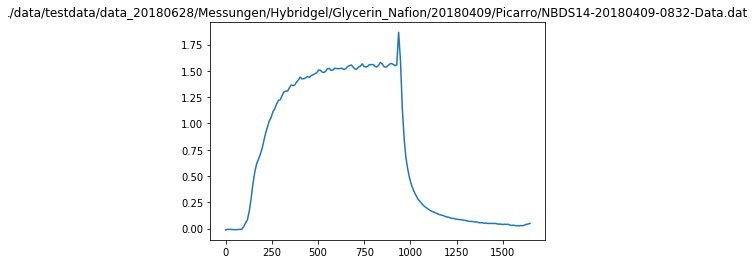

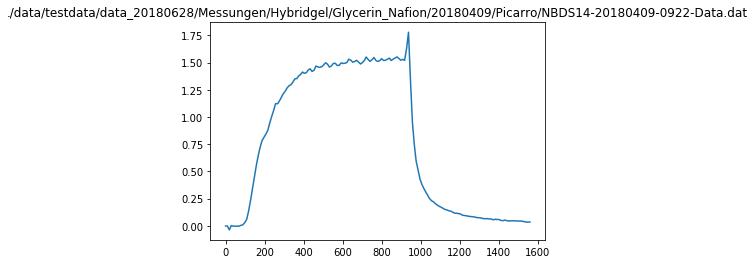

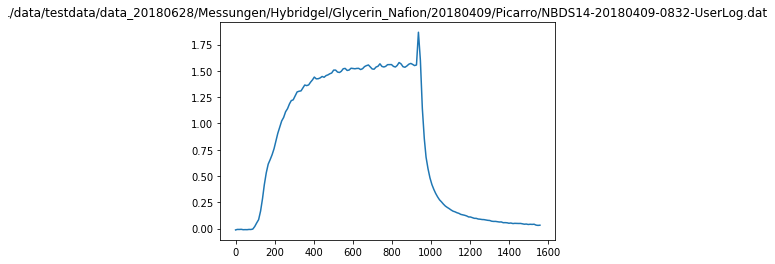

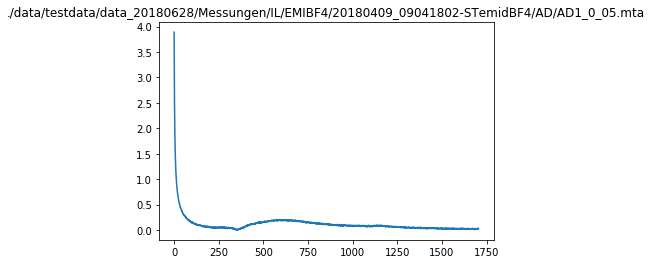

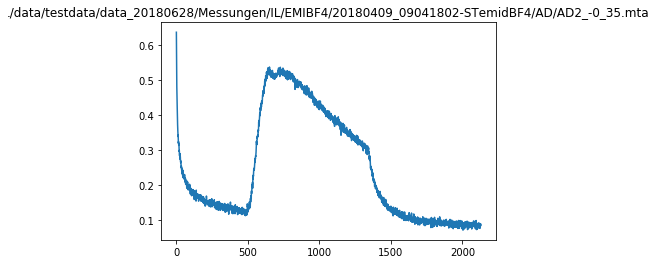

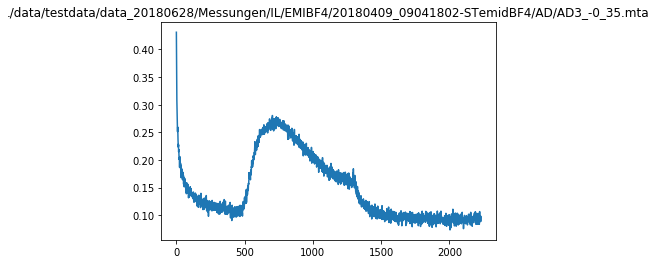

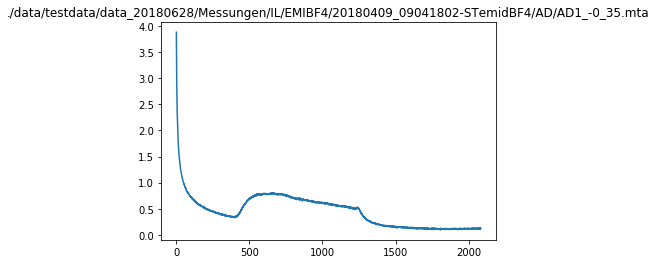

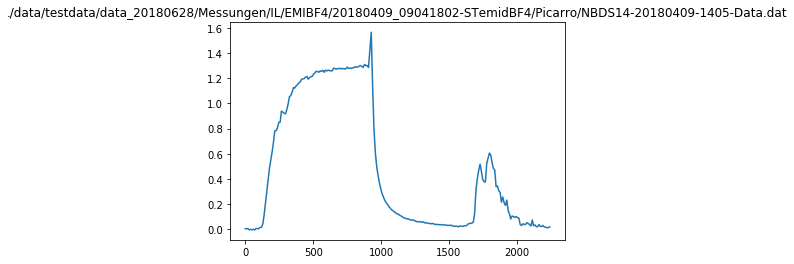

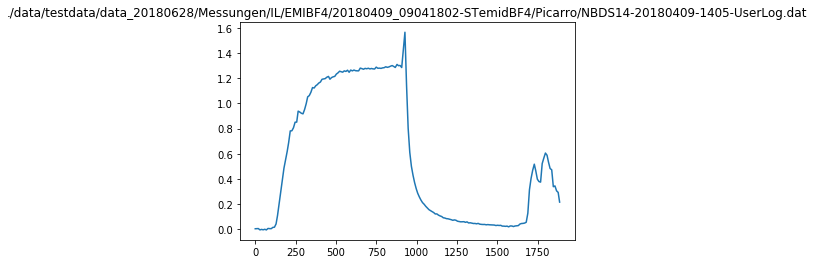

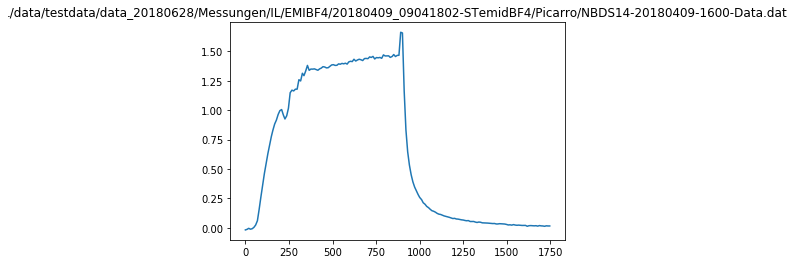

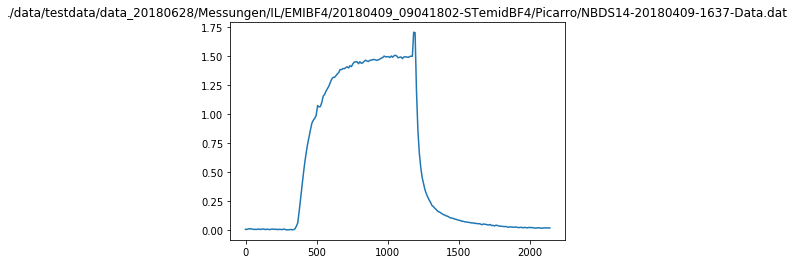

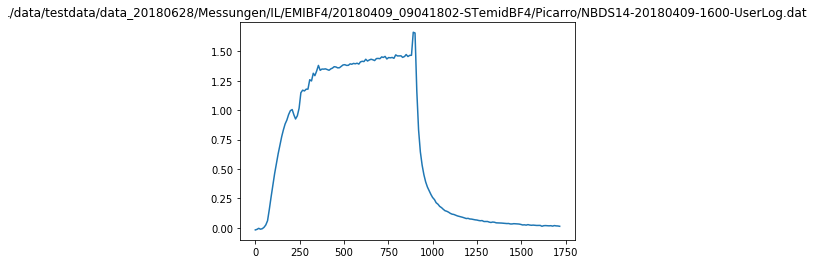

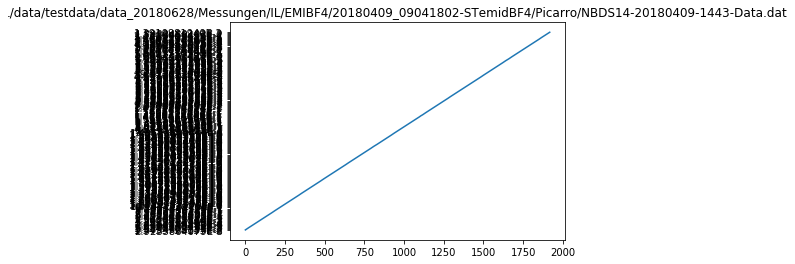

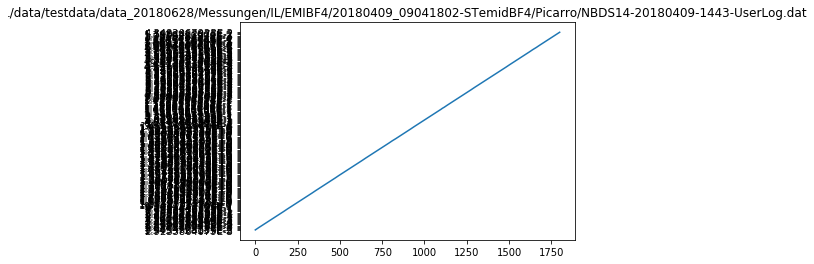

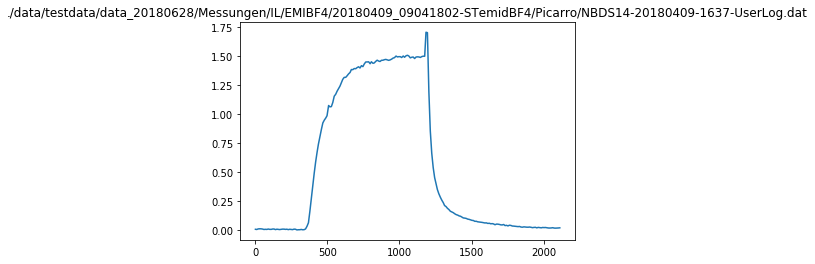

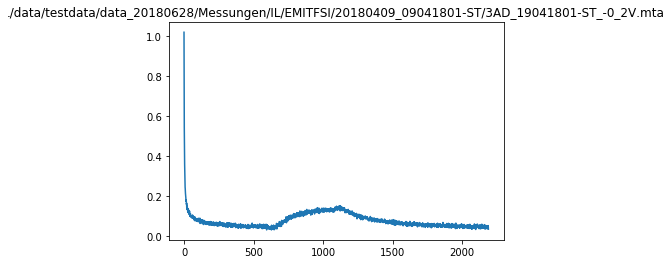

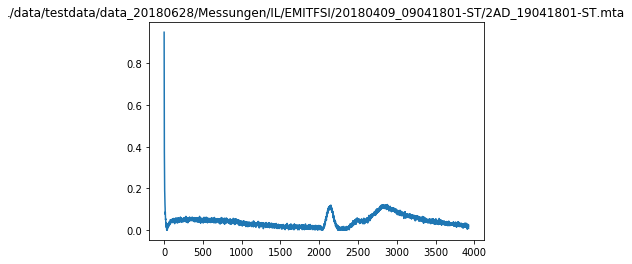

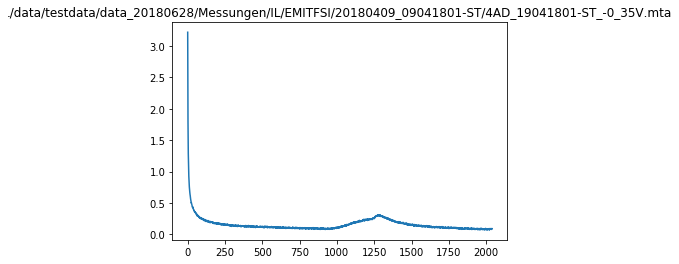

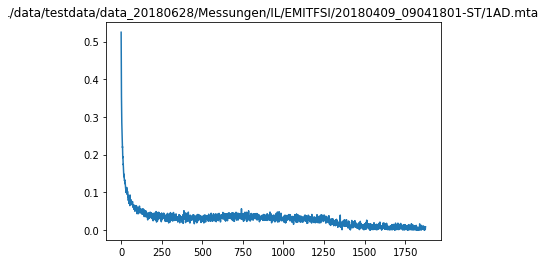

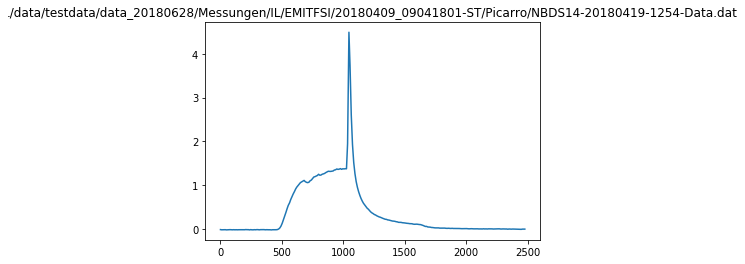

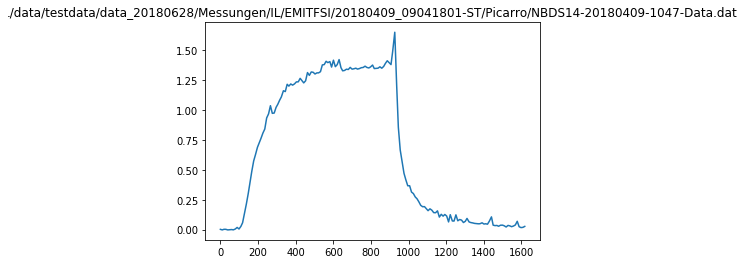

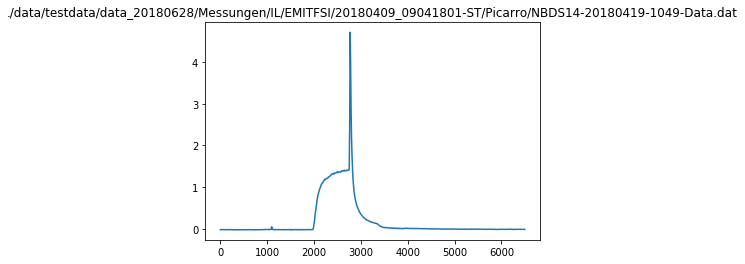

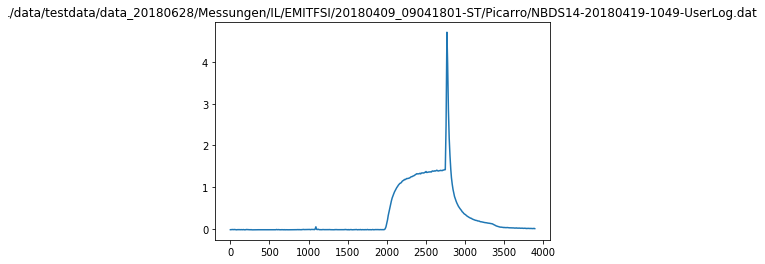

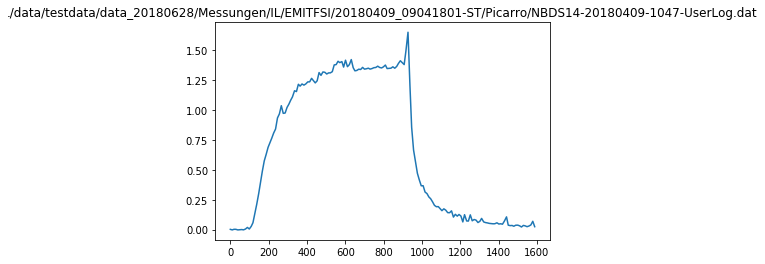

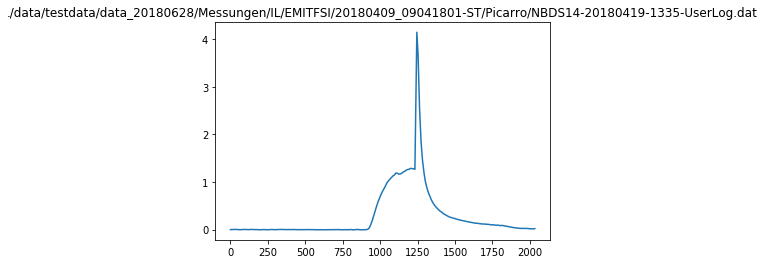

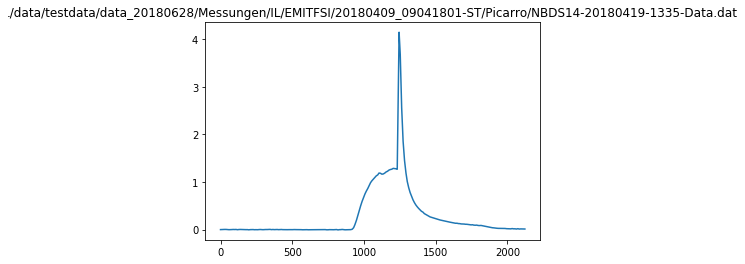

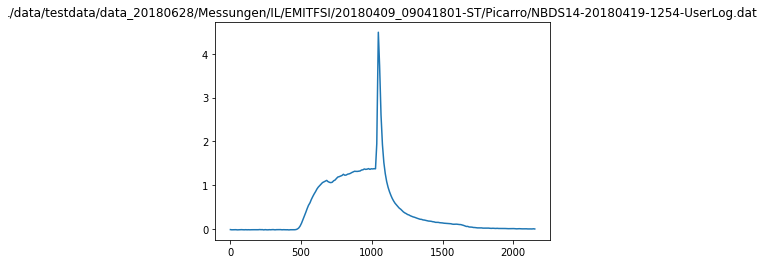

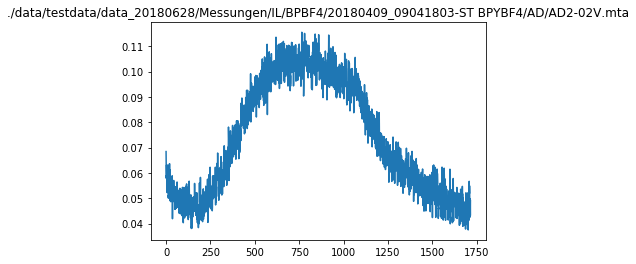

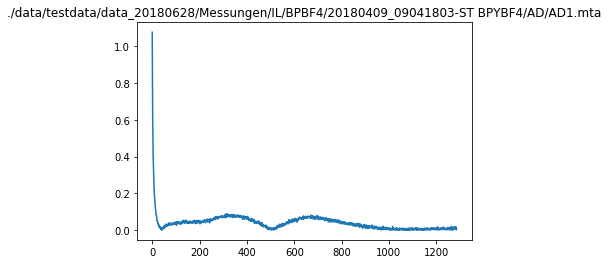

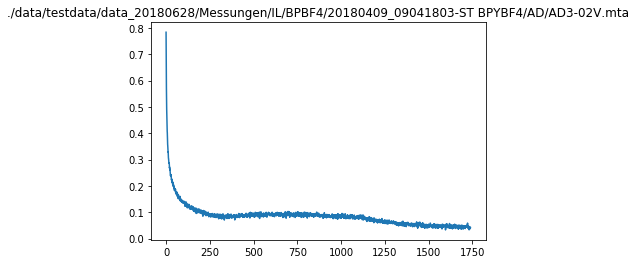

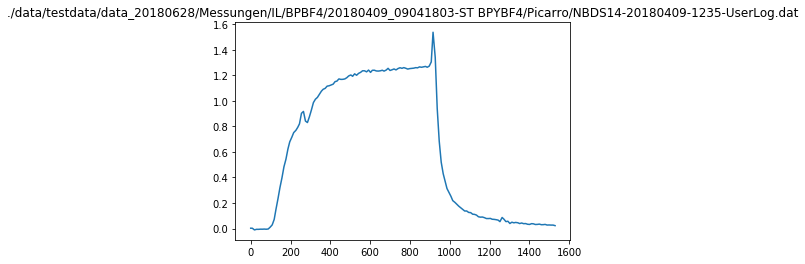

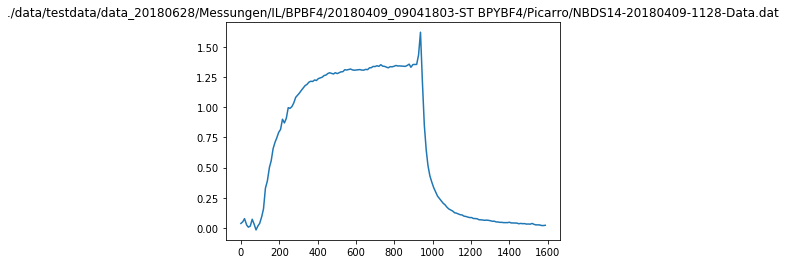

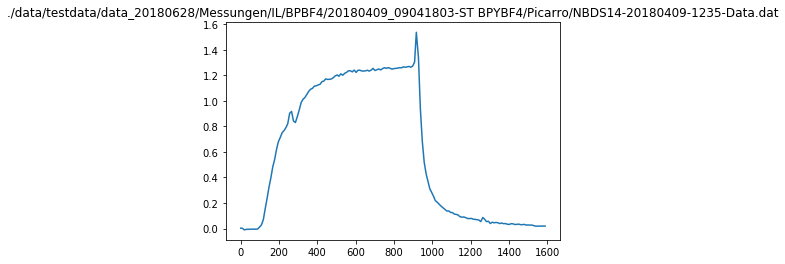

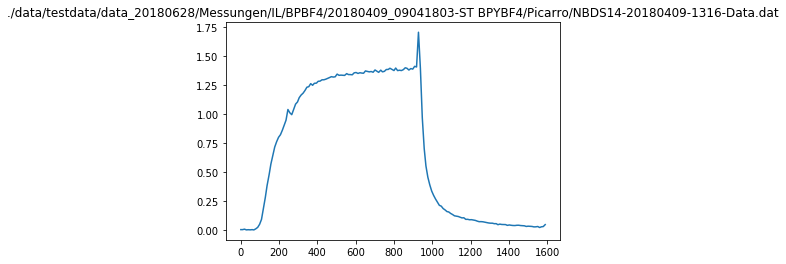

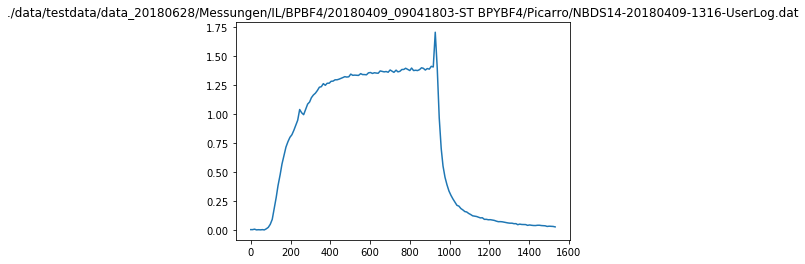

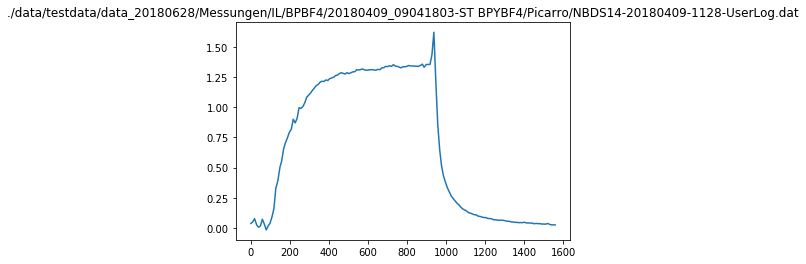

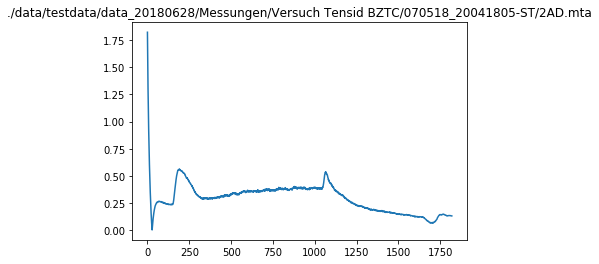

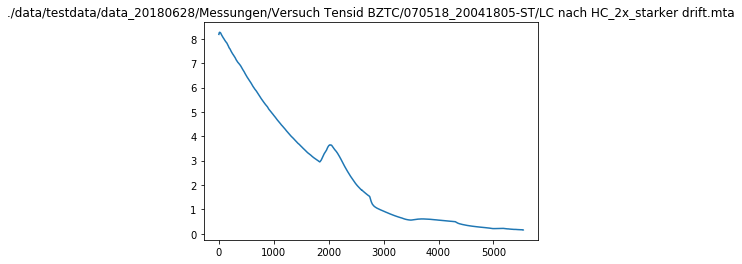

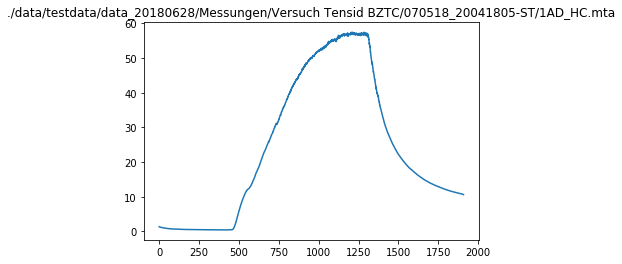

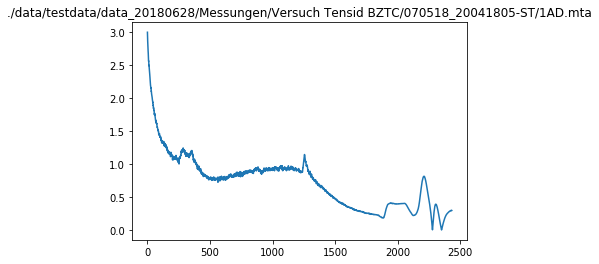

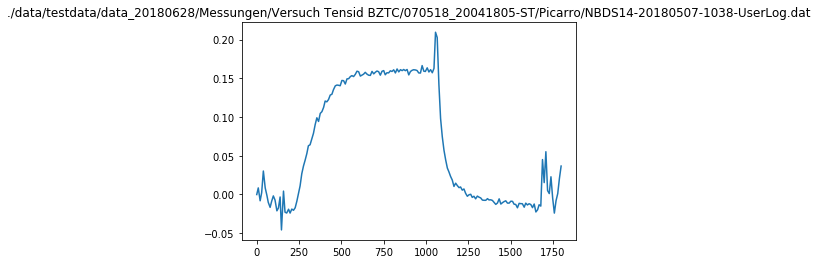

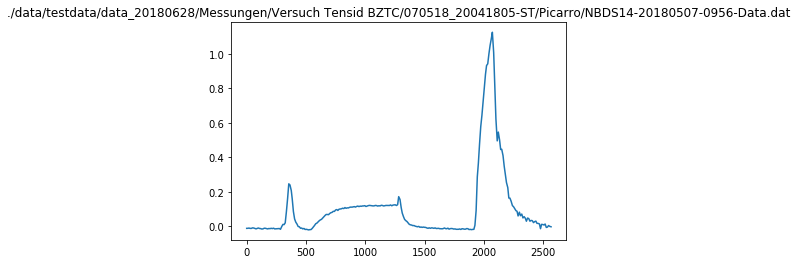

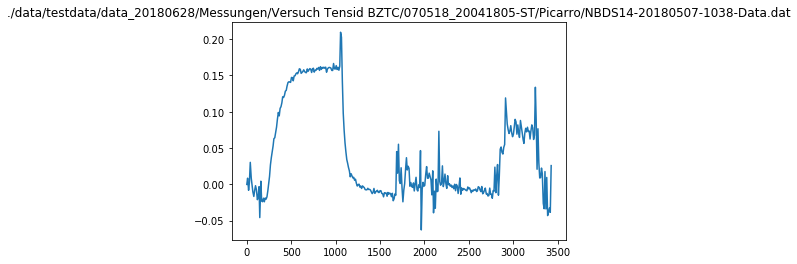

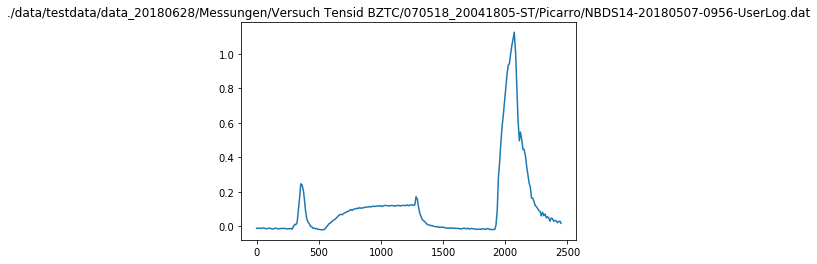

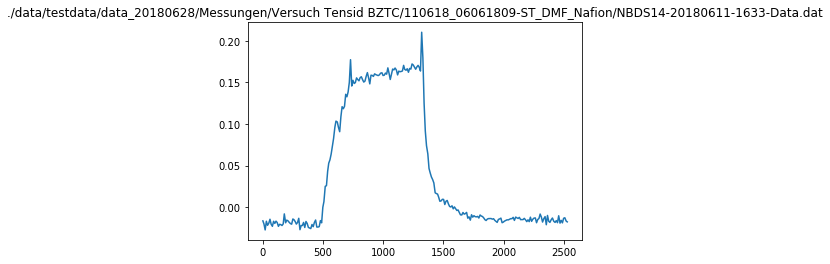

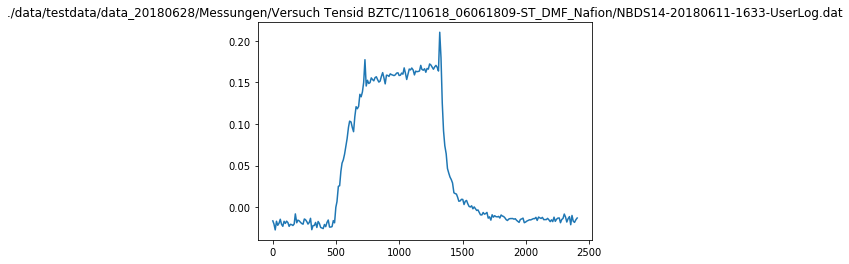

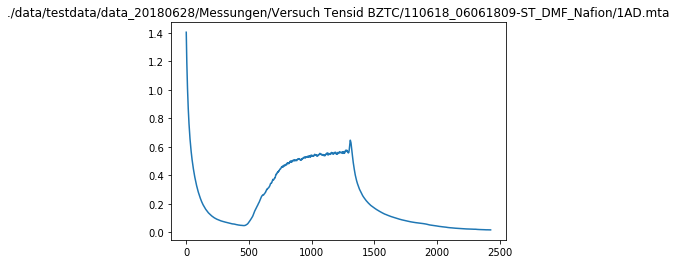

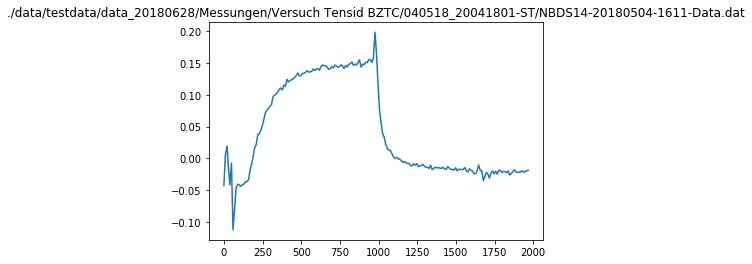

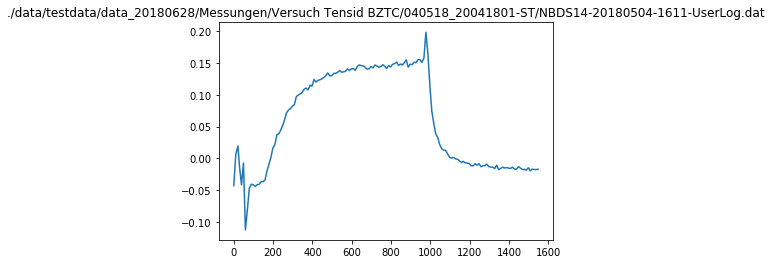

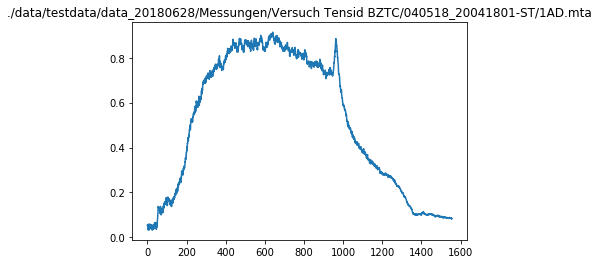

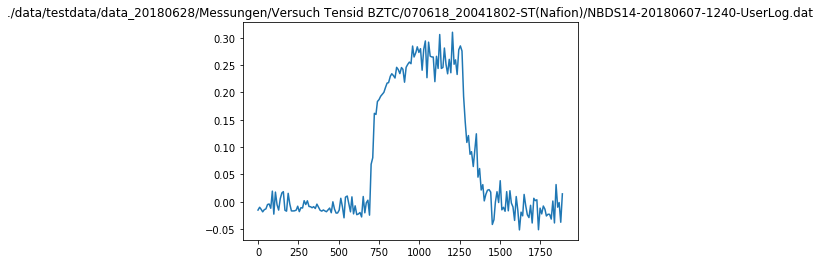

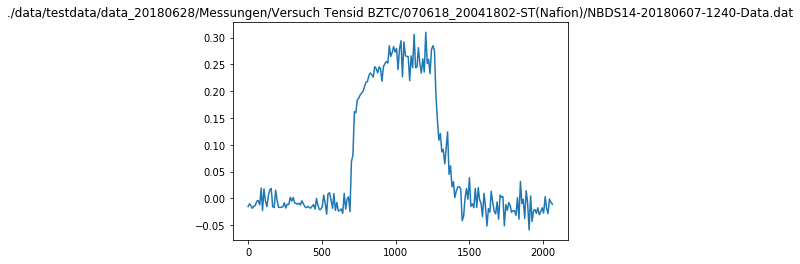

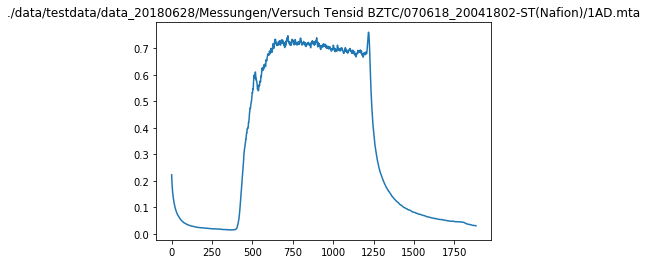

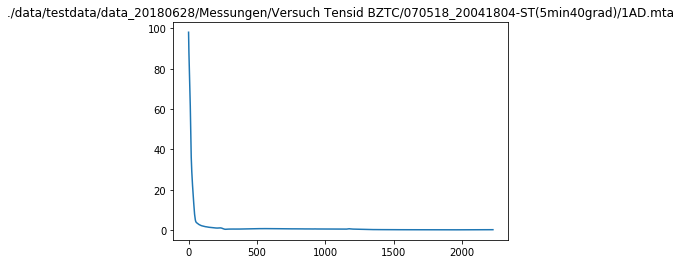

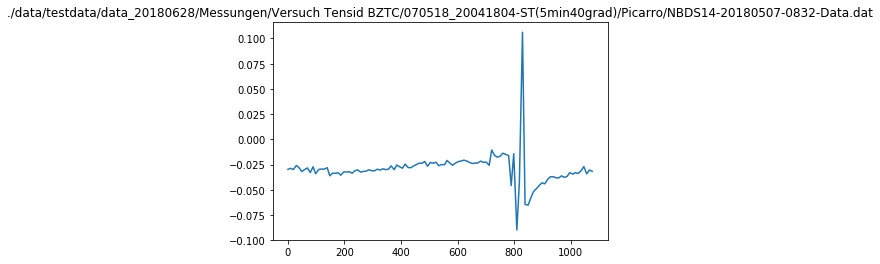

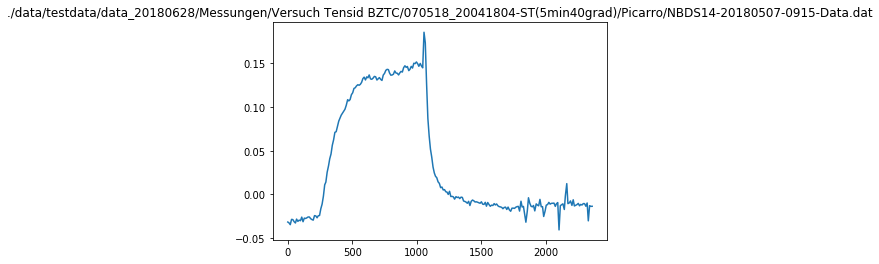

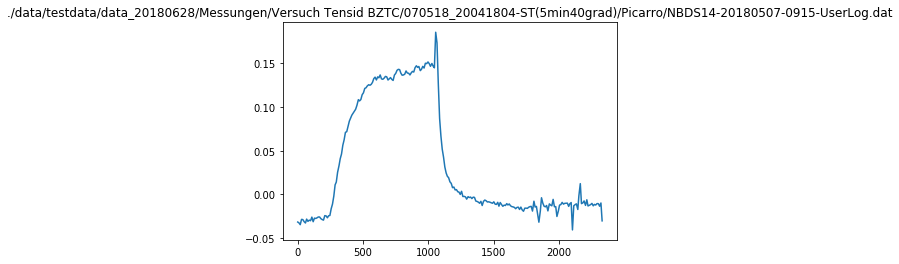

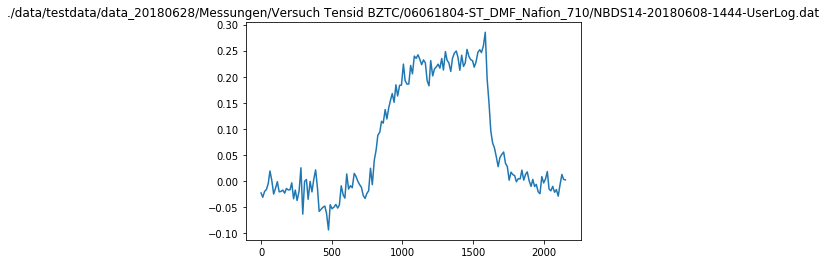

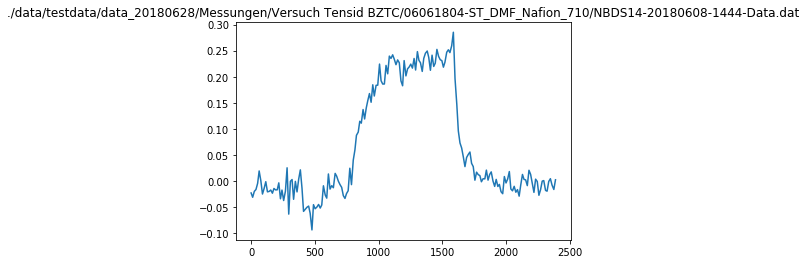

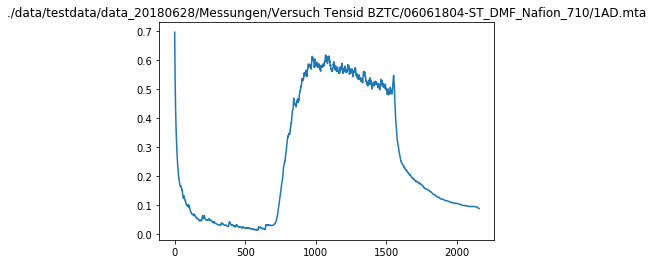

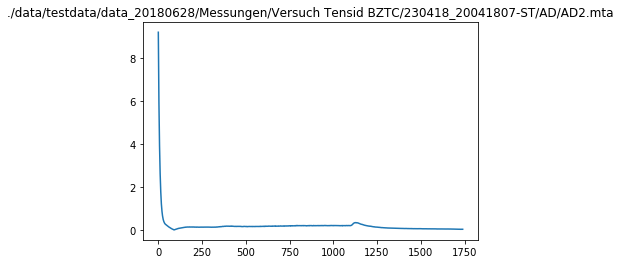

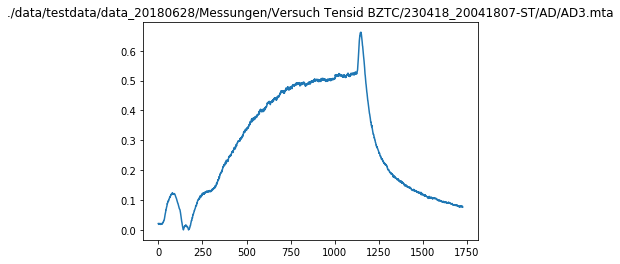

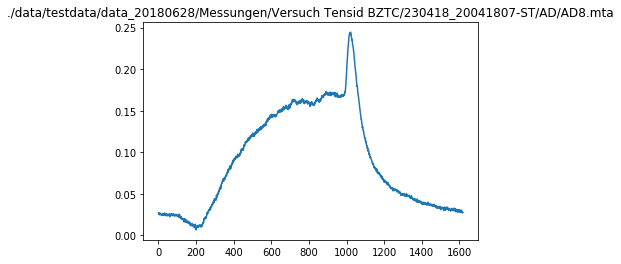

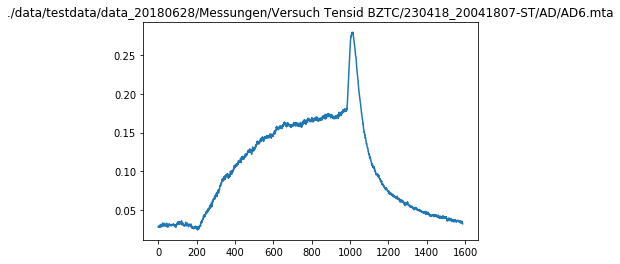

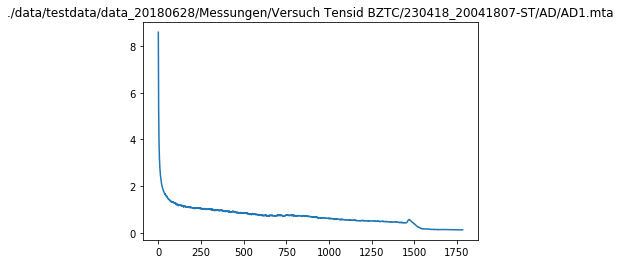

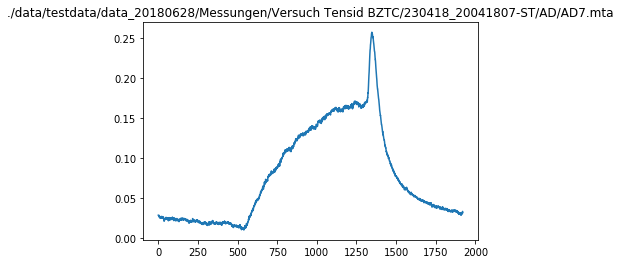

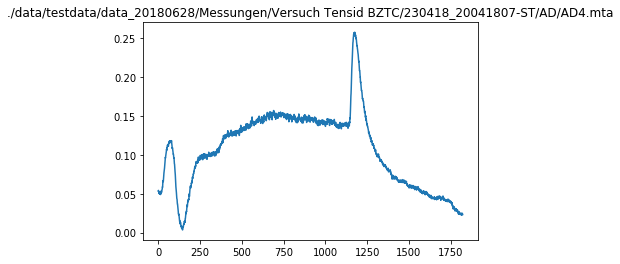

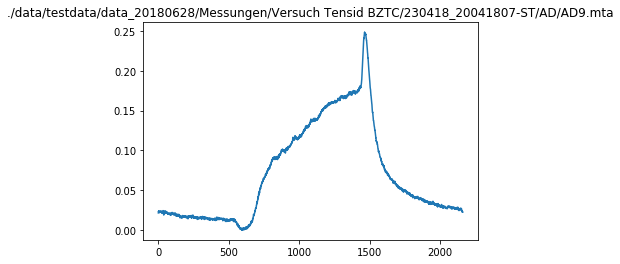

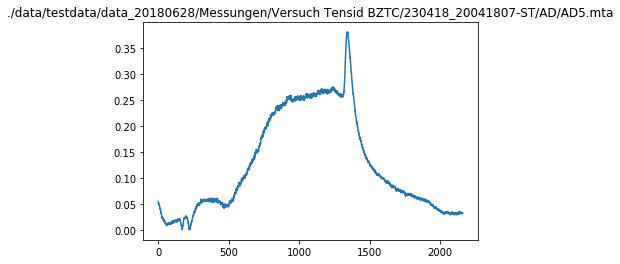

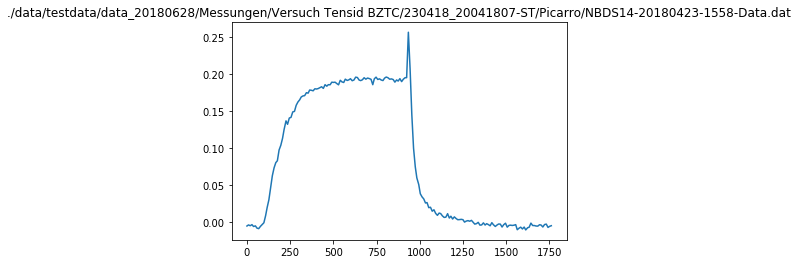

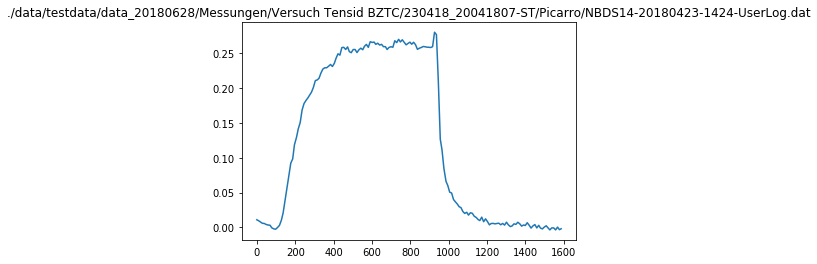

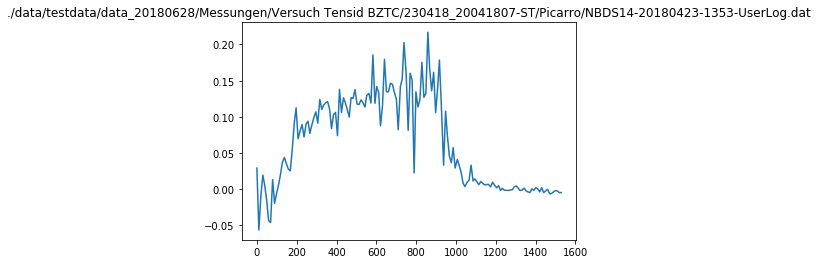

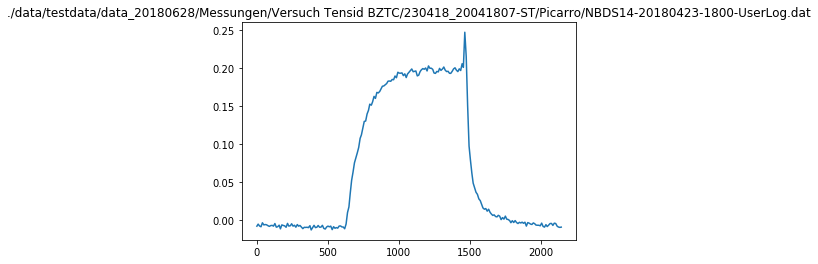

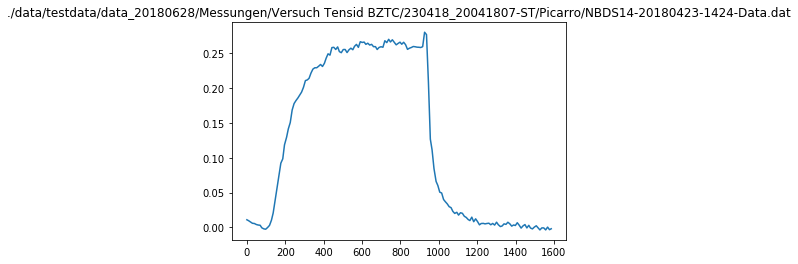

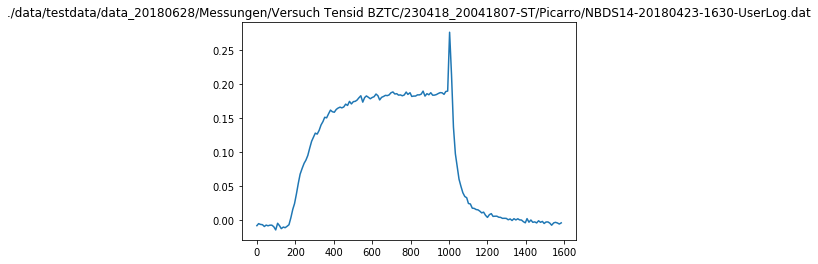

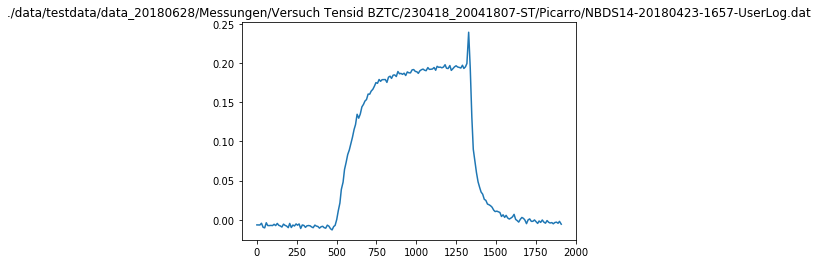

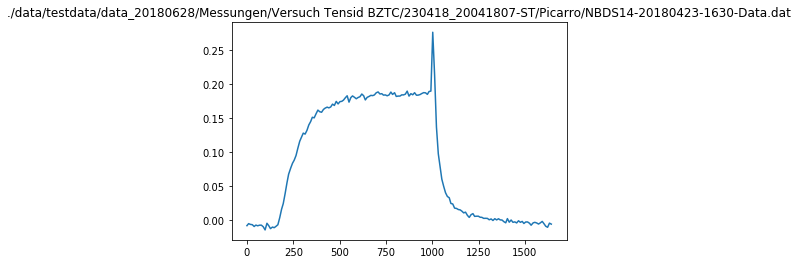

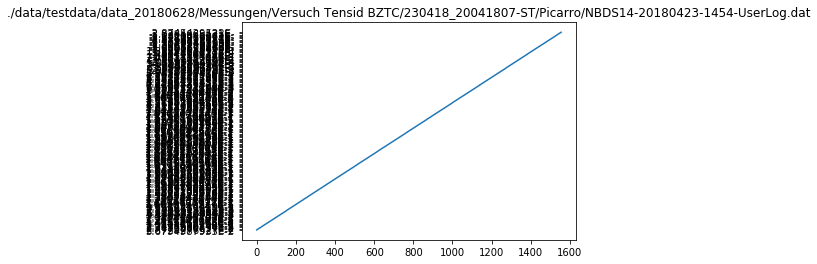

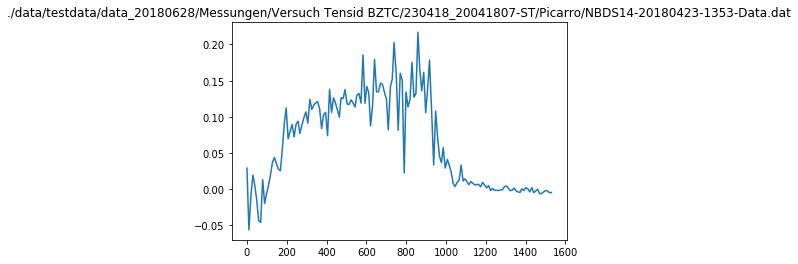

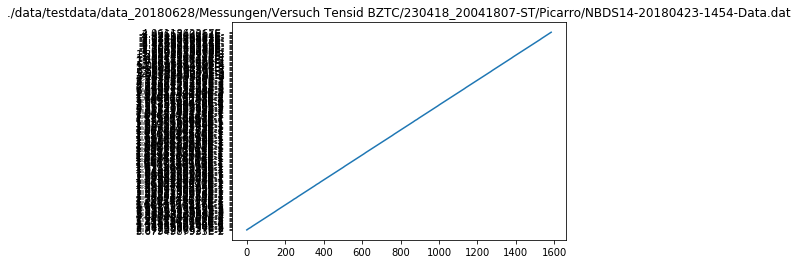

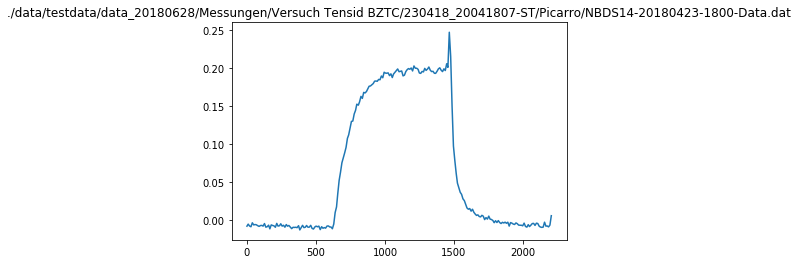

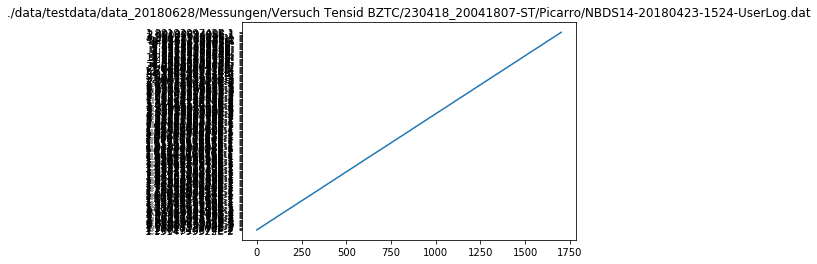

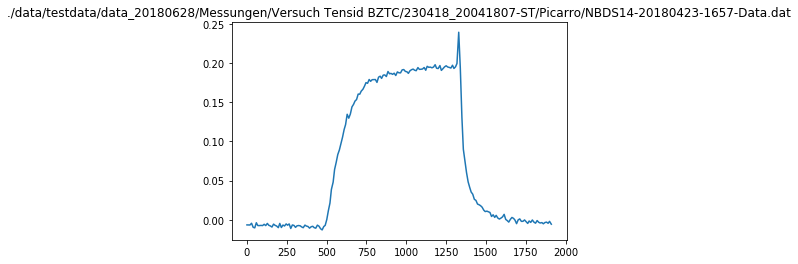

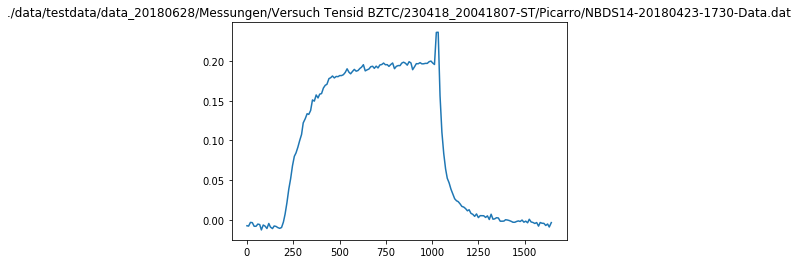

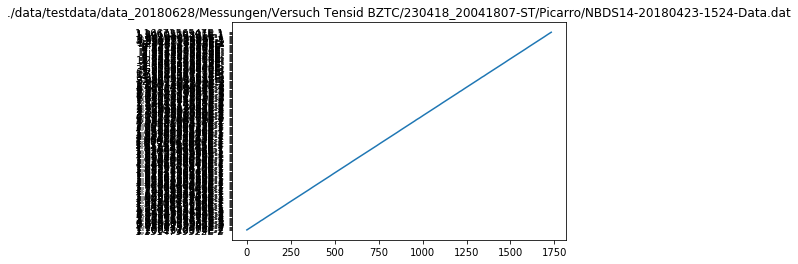

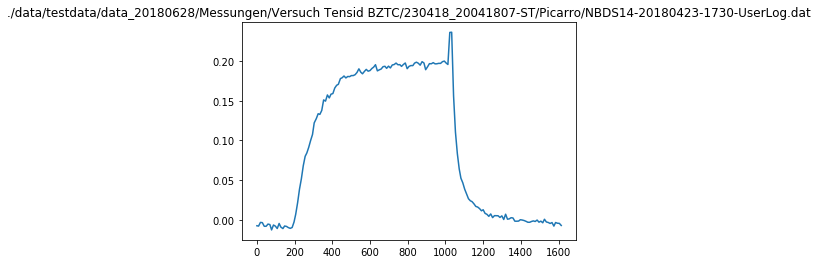

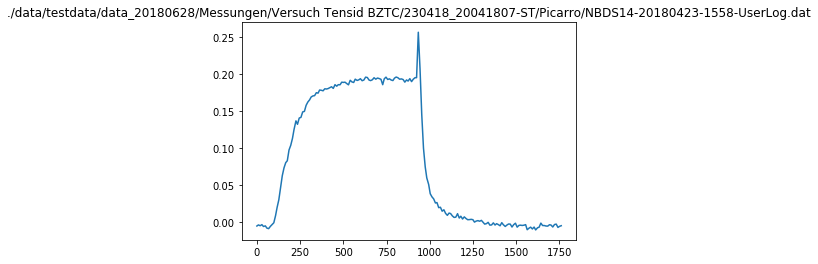

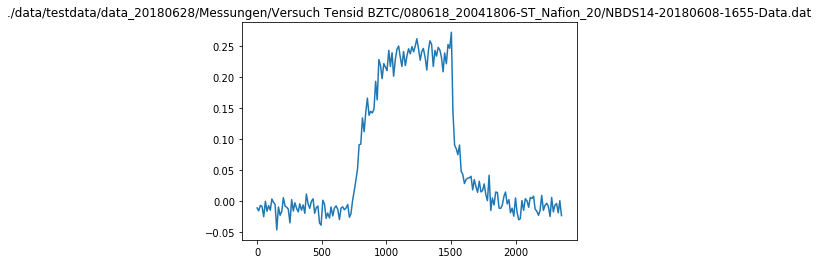

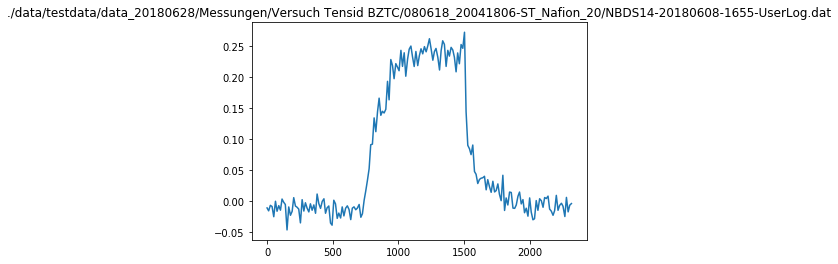

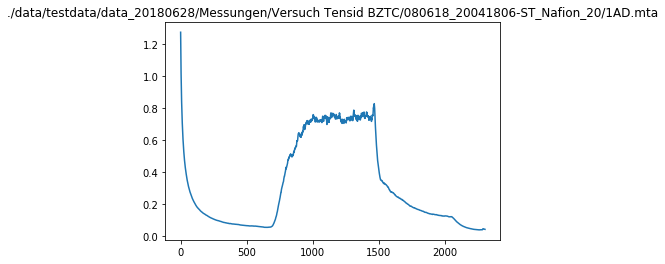

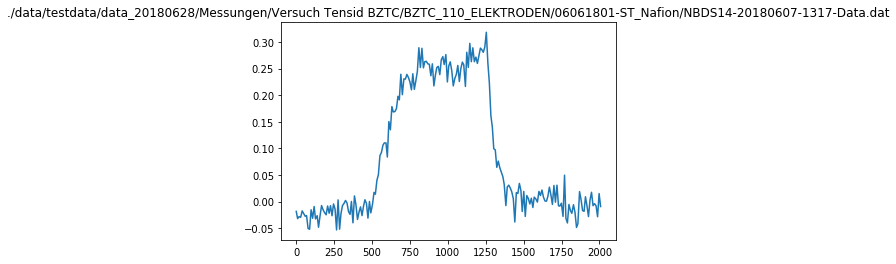

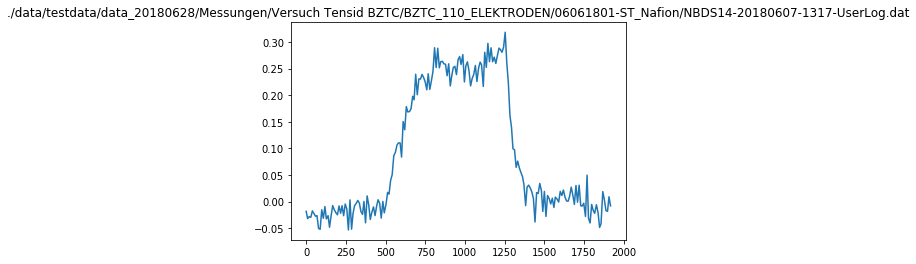

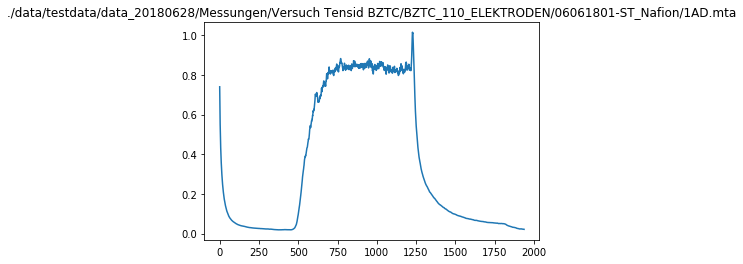

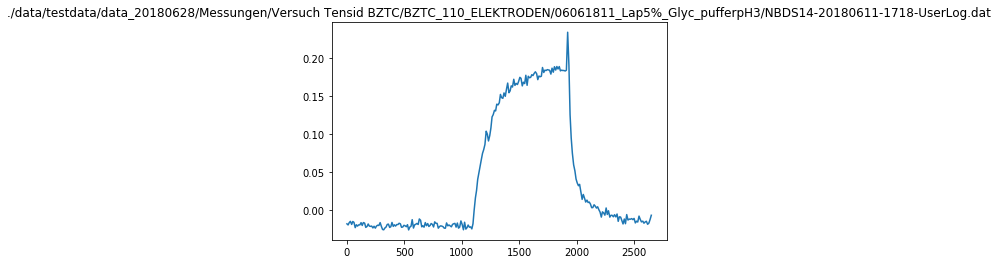

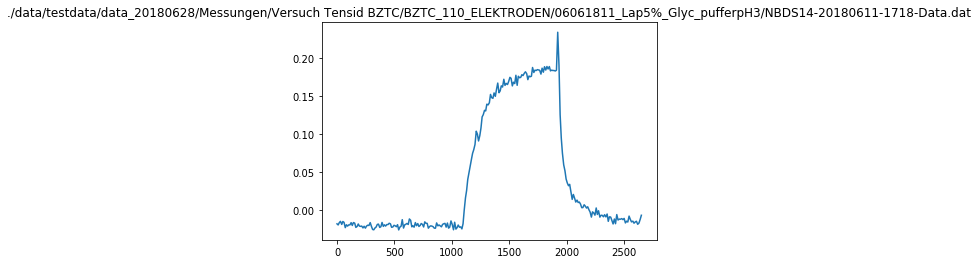

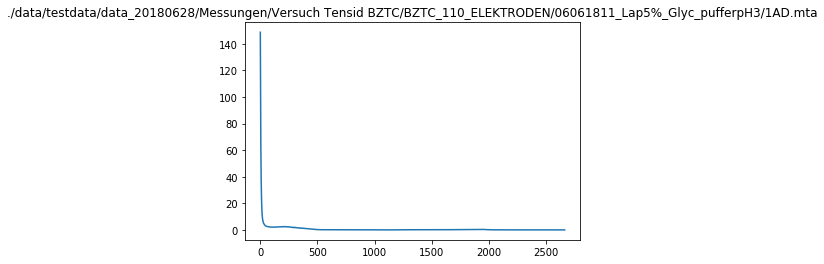

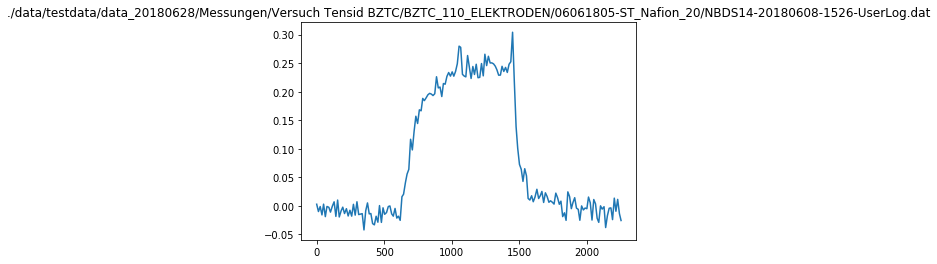

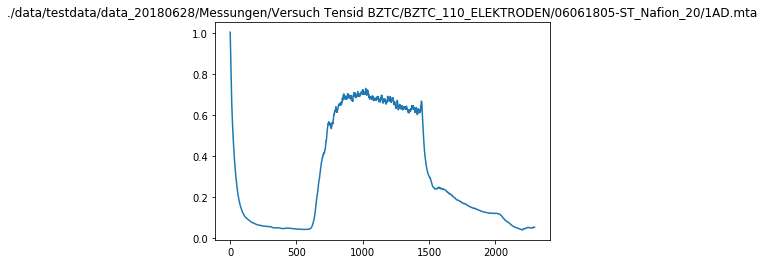

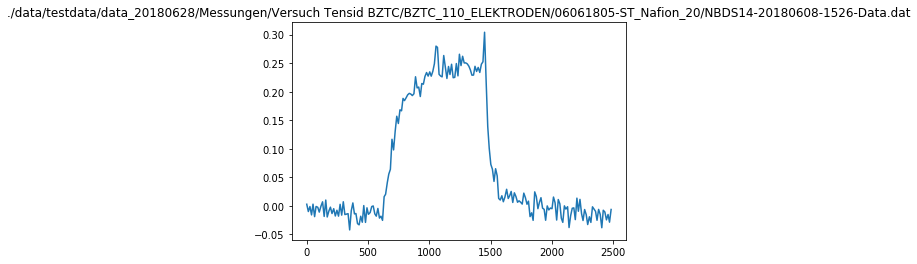

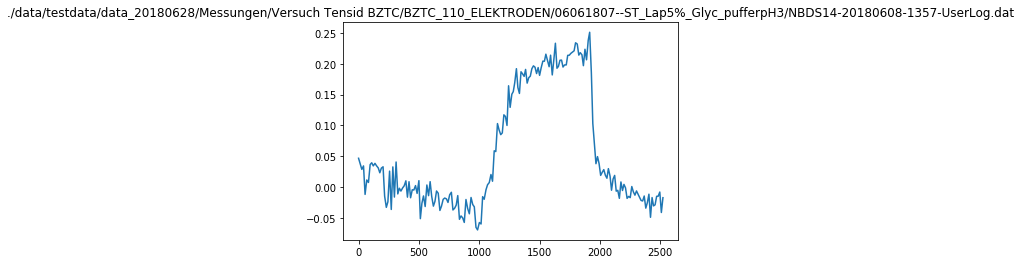

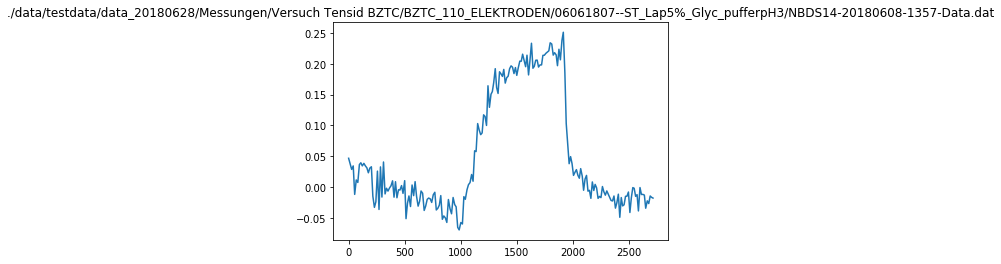

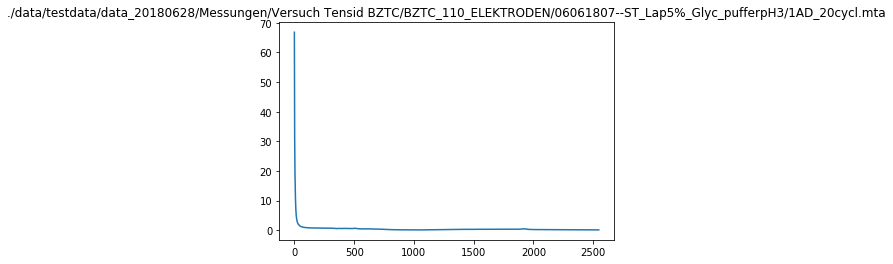

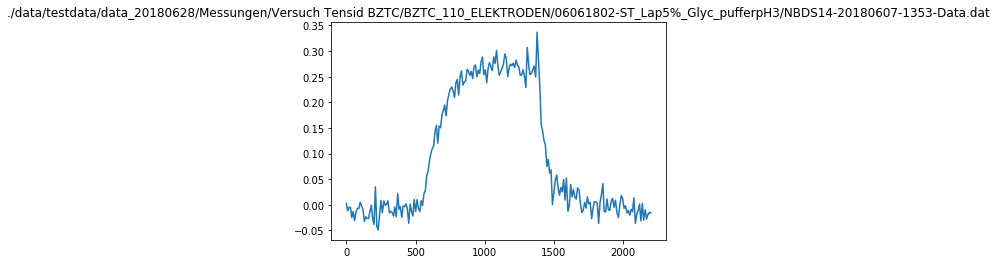

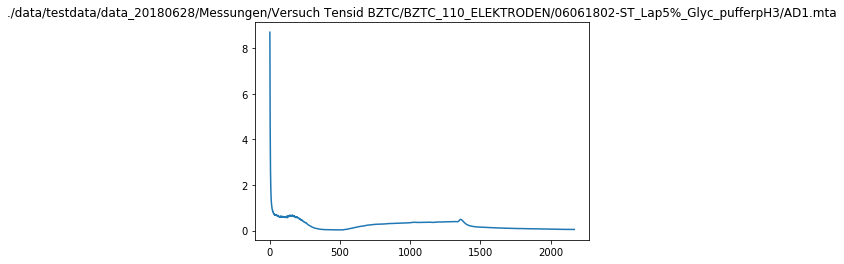

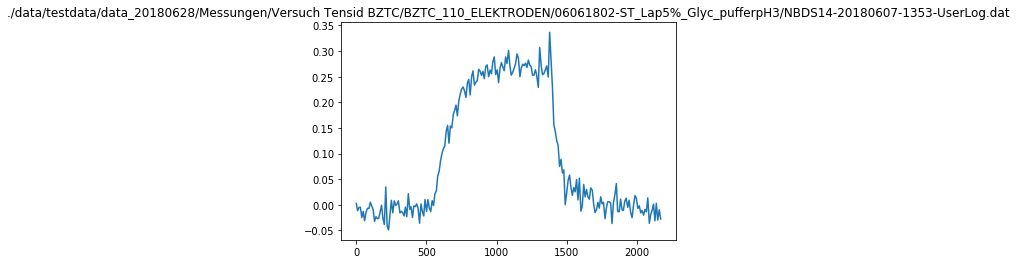

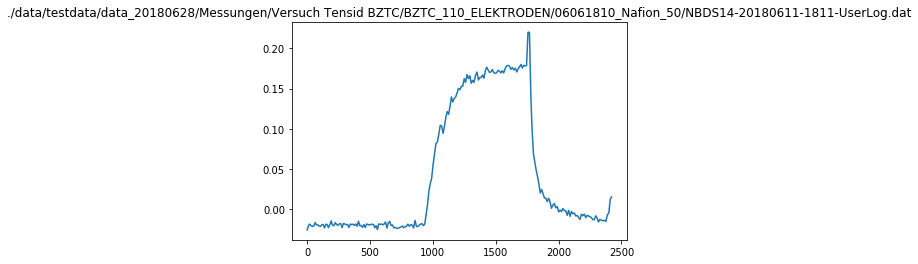

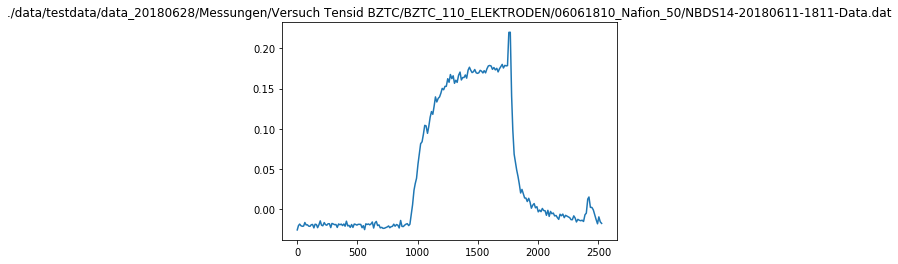

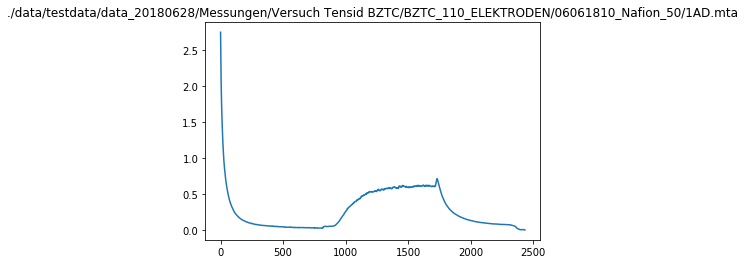

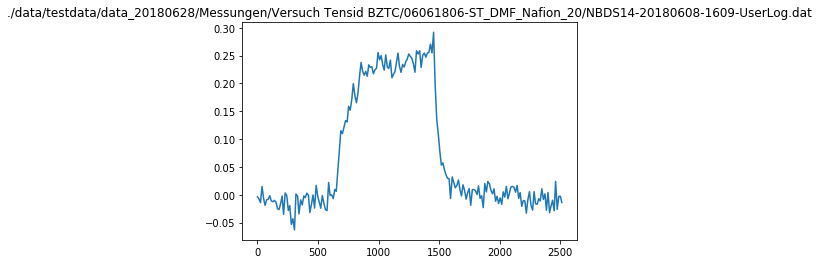

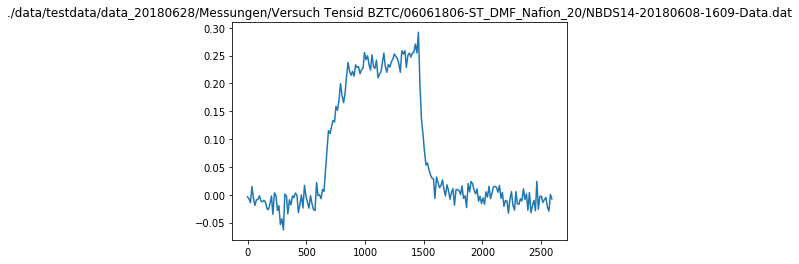

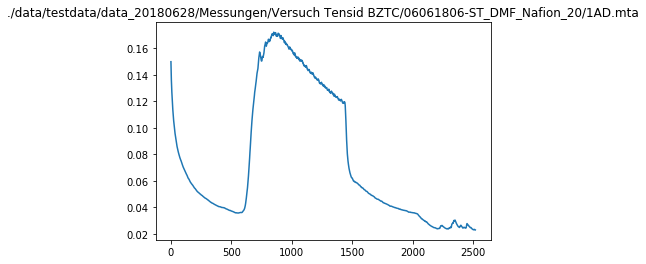

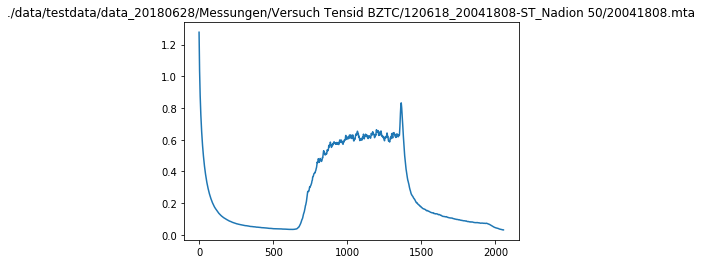

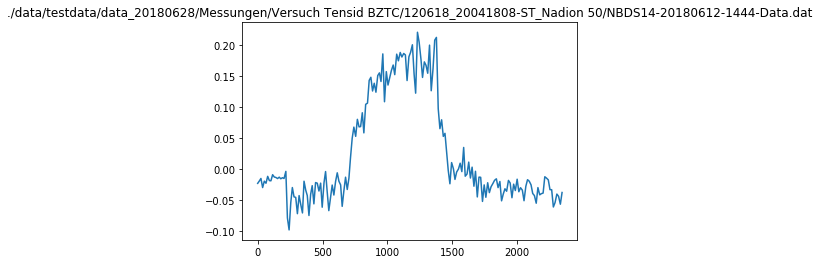

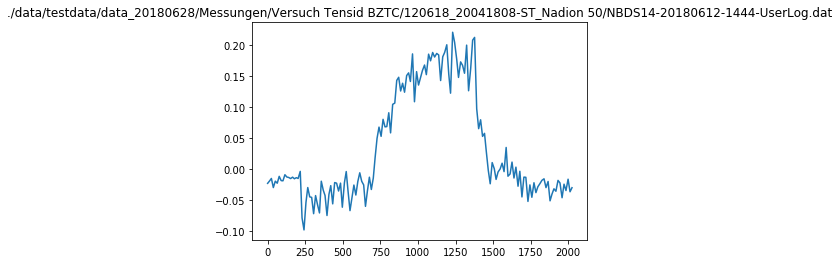

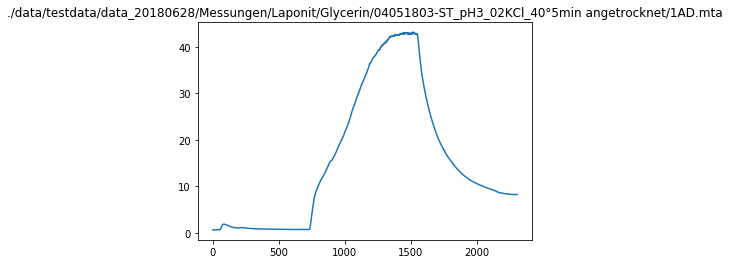

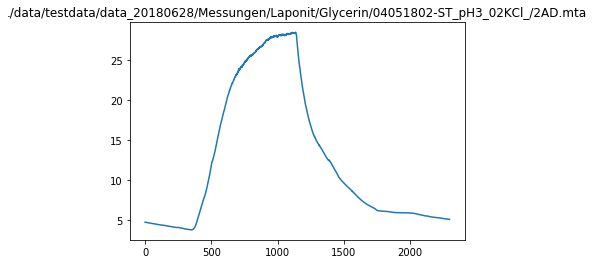

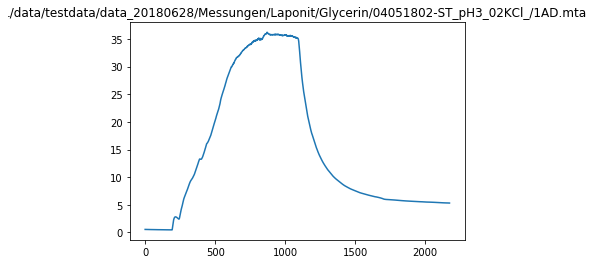

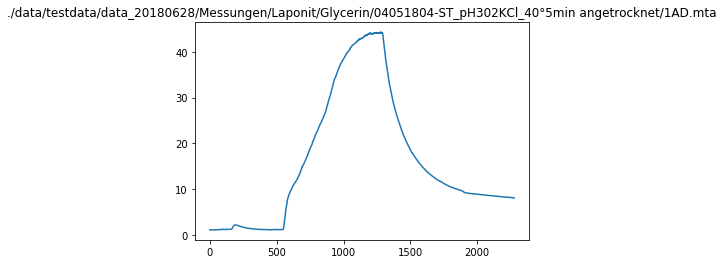

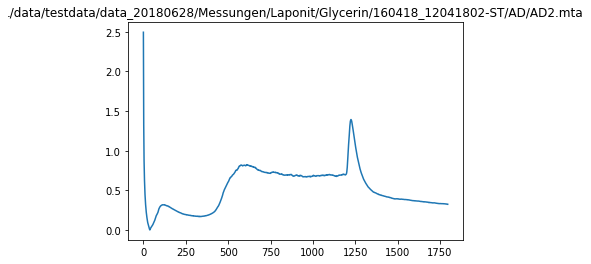

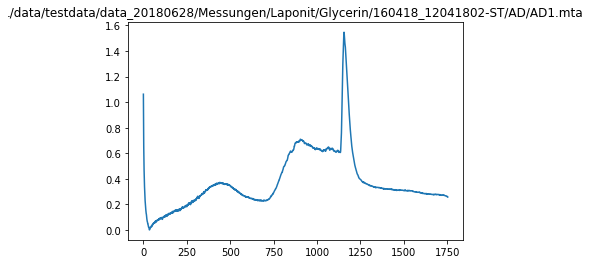

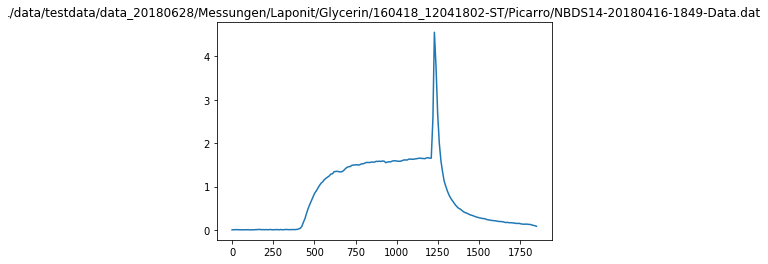

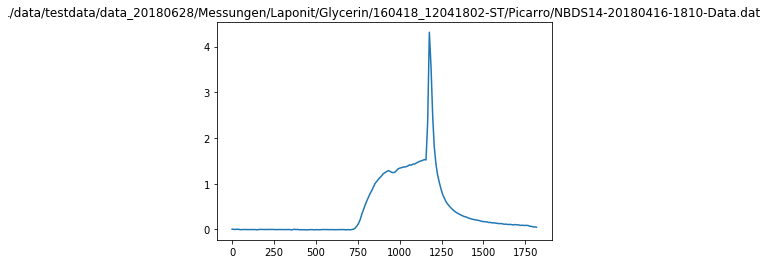

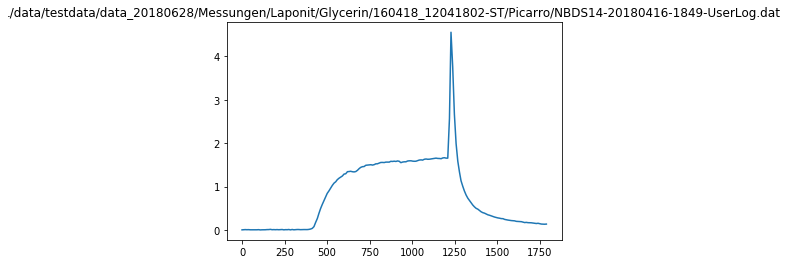

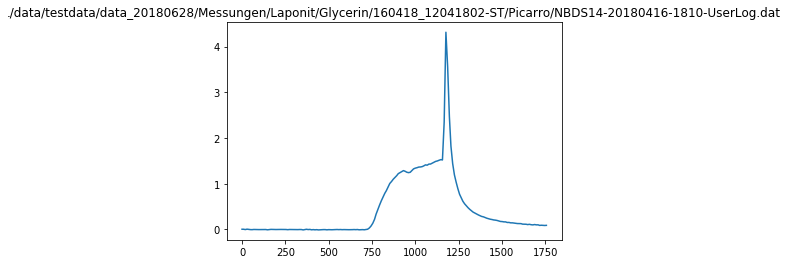

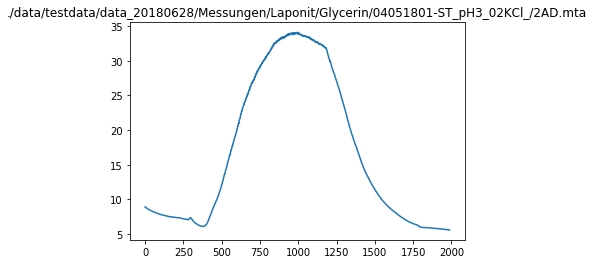

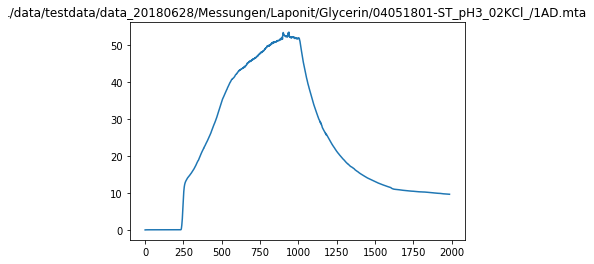

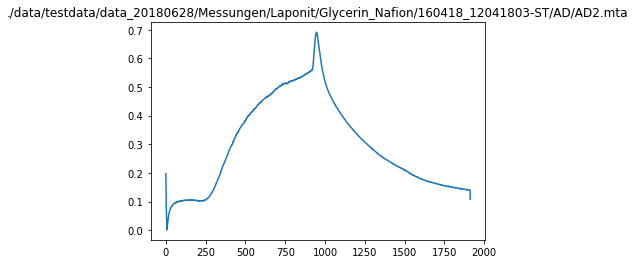

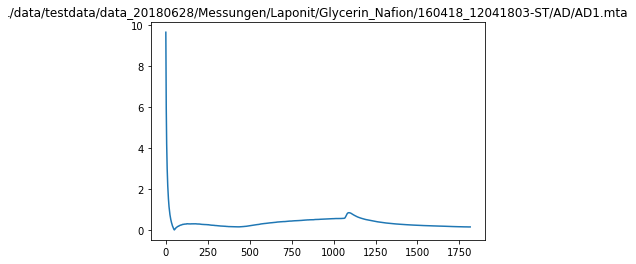

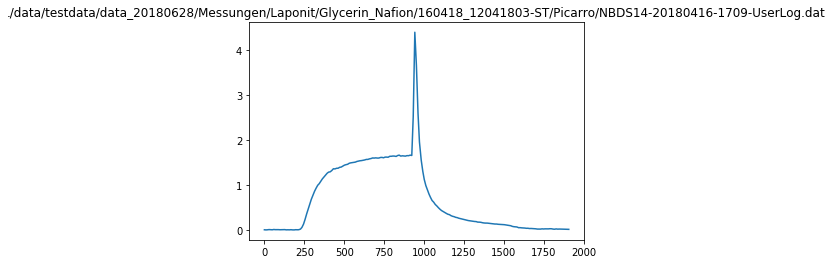

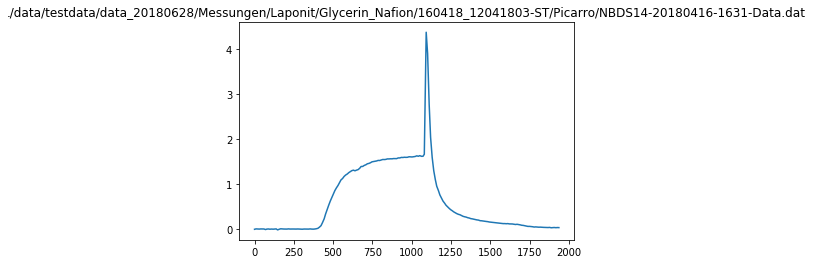

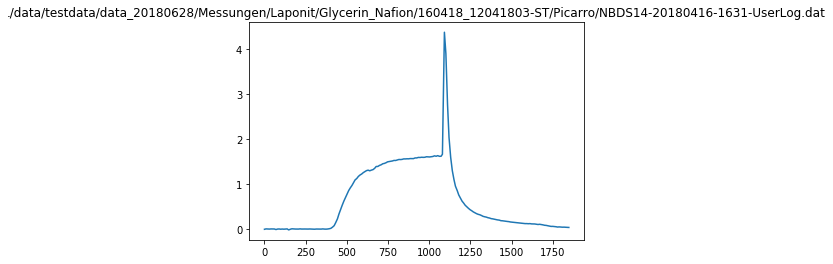

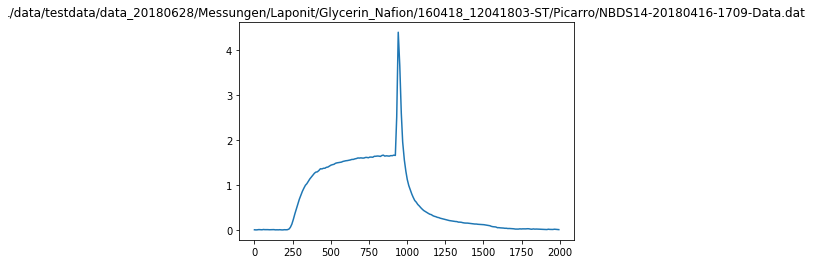

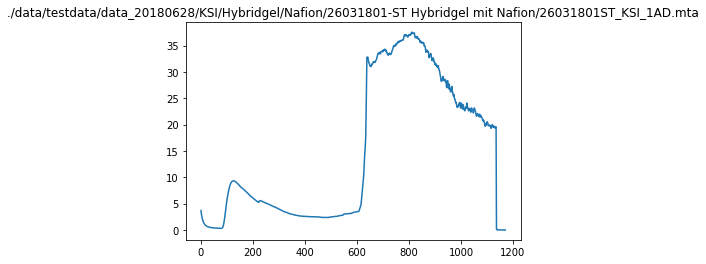

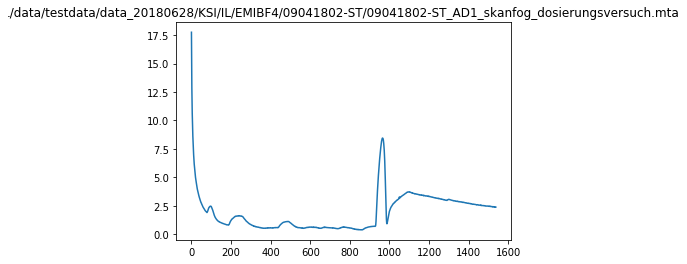

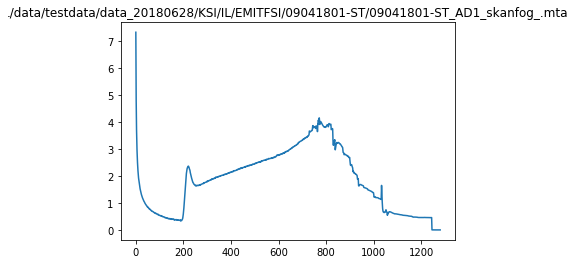

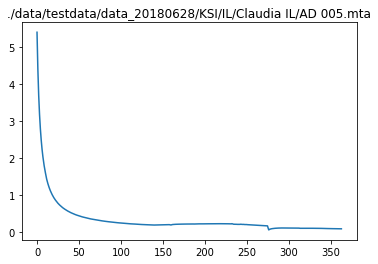

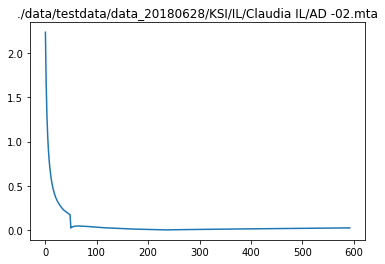

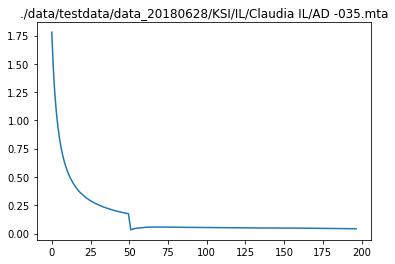

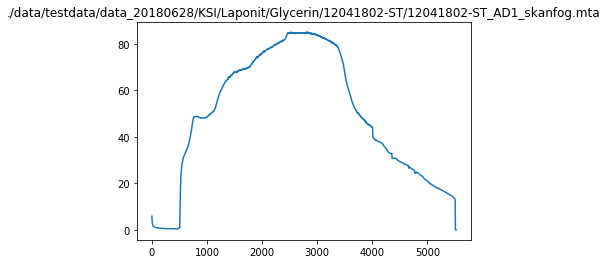

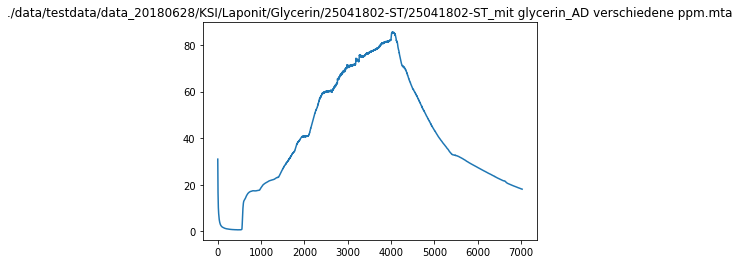

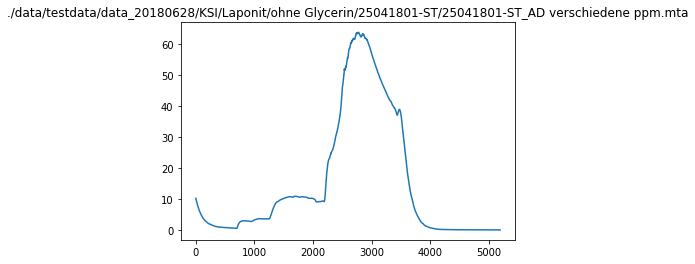

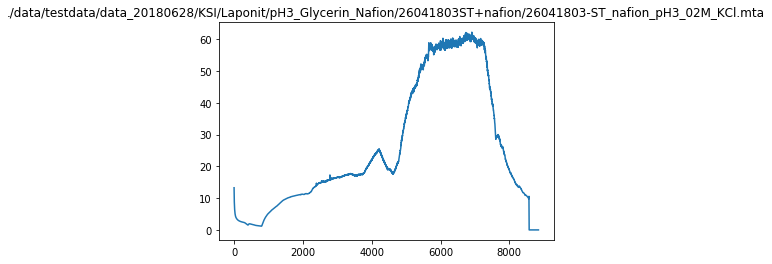

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
for dataset in datasets:
    time = dataset['data']['time']
    if dataset['type'] == 'dropsense':
        datapoints = dataset['data']['data_mamp']
    elif dataset['type'] == 'picarro':
        datapoints = dataset['data']['H2O2']
    plt.plot(time, datapoints)
    plt.title(dataset['path'])
    plt.show()

In [61]:
dirlist

[__main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.cat,
 __main__.